## Î™©Ï∞®

1. Best-first search
2. Breadth-first search
3. Uniform-cost search
4. Depth-first search
5. Depth limited and Iterative deepening search
6. Greedy best-first search
7. A* search
8. Weighted A* search

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import heapq
import math
import sys
from collections import defaultdict, deque, Counter
from itertools import combinations

# 1. Problem, Node, PriorityQueue Class

In [ ]:
class Problem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When yiou create an instance of a subclass, specify `initial`, and `goal` states
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwargs):
      """The constructor specifies the initial state, and possibly a goal
      state, if there is a unique goal. Your subclass's constructor can add
      other arguments."""
      self.__dict__.update(initial=initial, goal=goal, **kwargs)

    def actions(self, state):
      raise NotImplementedError

    def result(self, state, action):
      raise NotImplementedError

    def is_goal(self, state):
      return state == self.goal

    def action_cost(self, s, a, s1):
      return 1

    def h(self, node):
      return 0

    def __str__(self):
        return '{}({!r}, {!r})'.format(
            type(self).__name__, self.initial, self.goal)

*   `__init__(self, initial, goal)` : ÏÉùÏÑ±Ïûê(constructor)ÎùºÍ≥† Î∂àÎ¶¨Î©∞, ÌÅ¥ÎûòÏä§Ïùò Í∞ùÏ≤¥(instance)Î•º ÏÉùÏÑ±Ìï† Îïå Ï≤òÏùå Ìò∏Ï∂úÎêòÎäî Î©îÏÜåÎìúÏù¥Îã§. ÏòàÎ•º Îì§Ïñ¥ `Problem(initial, goal)`Î°ú ÌÅ¥ÎûòÏä§Ïùò Í∞ùÏ≤¥Î•º ÎßåÎì§ Îïå ÏÇ¨Ïö©ÎêúÎã§. Î≥ÄÏàò initialÏùÄ ÌÉêÏÉâ Î¨∏Ï†úÏùò Ï¥àÍ∏∞ ÏÉÅÌÉúÎ•º ÏßÄÏ†ïÌïòÎ©∞, start stateÏùÑ ÎÇòÌÉÄÎÇ∏Îã§.

*   `actions(self, state)` : Ï£ºÏñ¥ÏßÑ ÏÉÅÌÉúÏóêÏÑú ÏóêÏù¥Ï†ÑÌä∏Í∞Ä Ïã§ÌñâÌï† Ïàò ÏûàÎäî Î™®Îì† Í∞ÄÎä•Ìïú ÎèôÏûë(Ïï°ÏÖò)ÏùÑ Î∞òÌôòÌïúÎã§.

*   `result(self, state, action)` :  Ï£ºÏñ¥ÏßÑ ÏÉÅÌÉúÏóêÏÑú Ï£ºÏñ¥ÏßÑ ÎèôÏûëÏùÑ Ïã§ÌñâÌñàÏùÑ ÎïåÏùò Í≤∞Í≥º ÏÉÅÌÉúÎ•º Î∞òÌôòÌïúÎã§.

*   `is_goal(self, state)` : Ï£ºÏñ¥ÏßÑ ÏÉÅÌÉúÍ∞Ä goal stateÏù∏ÏßÄ Ïó¨Î∂ÄÎ•º ÌåêÎã®ÌïòÏó¨ Boolean Í∞íÏùÑ Î∞òÌôòÌïúÎã§. Goal stateÏù∏ Í≤ΩÏö∞ TrueÎ•º Î∞òÌôòÌïòÍ≥†, Í∑∏Î†áÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ FalseÎ•º Î∞òÌôòÌïúÎã§.

*   `action_cost(self, s, a, s1)` : State `s`ÏóêÏÑú action `a`Î•º Ï∑®ÌïòÏó¨ state `s1`Î°ú ÎèÑÎã¨ÌïòÎäî Í≤ΩÎ°úÏùò ÎπÑÏö©ÏùÑ Î∞òÌôòÌïúÎã§.

*    `h(self, node)` : Ï£ºÏñ¥ÏßÑ ÎÖ∏ÎìúÏóê ÎåÄÌïú Ìú¥Î¶¨Ïä§Ìã± Í∞íÏùÑ Î∞òÌôòÌïúÎã§.

*   `__str__(self)` : ÌëúÏ§Ä ÌååÏù¥Ïç¨ Í∏∞Îä•ÏùÑ Ïò§Î≤ÑÎùºÏù¥ÎìúÌïòÏó¨ Ìï¥Îãπ ÌÅ¥ÎûòÏä§Ïùò Í∞ùÏ≤¥Î•º Î¨∏ÏûêÏó¥Î°ú ÌëúÌòÑÌïúÎã§.



In [ ]:
class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

    def __repr__(self):
      return '<{}>'.format(self.state)

    def __len__(self):
      return 0 if self.parent is None else (1 + len(self.parent))

    def __lt__(self, other):
      return self.path_cost < other.path_cost

*   `__init__(self, state, parent, action, path_cost)` : `Node` ÌÅ¥ÎûòÏä§Ïùò Í∞ùÏ≤¥Î•º ÏÉùÏÑ±ÌïòÎäî ÏÉùÏÑ±ÏûêÏù¥Îã§. `parent`Îäî ÌòÑÏû¨ ÎÖ∏ÎìúÏùò Ïù¥Ï†Ñ ÎÖ∏ÎìúÎ•º ÎÇòÌÉÄÎÇ¥Î©∞, `action`ÏùÄ Î∂ÄÎ™® ÎÖ∏ÎìúÏóêÏÑú ÌòÑÏû¨ ÎÖ∏ÎìúÎ°ú Ïù¥ÎèôÌïòÎäî Îç∞ ÌïÑÏöîÌïú ÌñâÎèôÏù¥Îã§. `path_cost`Îäî Î∂ÄÎ™® ÎÖ∏ÎìúÎ°úÎ∂ÄÌÑ∞ ÌòÑÏû¨ ÎÖ∏ÎìúÏóê ÎèÑÎã¨ÌïòÎäî ÎπÑÏö©Ïù¥Îã§.

*   `__repr__(self)` : ÎÖ∏ÎìúÎ•º ÎÇòÌÉÄÎÇ¥Îäî Î¨∏ÏûêÏó¥ÏùÑ Î∞òÌôòÌïúÎã§.

*   `__len__(self, other)` : ÎÖ∏ÎìúÏóêÏÑú Î∂ÄÎ™® ÎÖ∏ÎìúÍπåÏßÄÏùò Í≤ΩÎ°úÏùò Í∏∏Ïù¥Î•º Î∞òÌôòÌïúÎã§.

*   `__lt__(self, node)` : ÌòÑÏû¨ ÎÖ∏ÎìúÏùò Í≤ΩÎ°ú ÎπÑÏö©Ïù¥ Îã§Î•∏ ÎÖ∏ÎìúÏùò Í≤ΩÎ°ú ÎπÑÏö©Î≥¥Îã§ ÏûëÏùÄÏßÄ Ïó¨Î∂ÄÎ•º ÌåêÎã®ÌïúÎã§.

In [ ]:
failure = Node('failure', path_cost=math.inf) # Indicates an algorithm couldn't find a solution.
cutoff  = Node('cutoff',  path_cost=math.inf) # Indicates iterative deepening search was cut off.

def path_actions(node):
    "The sequence of actions to get to this node."
    if node.parent is None:
        return []
    return path_actions(node.parent) + [node.action]

def path_states(node):
    "The sequence of states to get to this node."
    if node in (cutoff, failure, None):
        return []
    return path_states(node.parent) + [node.state]

In [ ]:
FIFOQueue = deque

LIFOQueue = list

class PriorityQueue:
    """A queue in which the item with minimum f(item) is always popped first."""

    def __init__(self, items=(), key=lambda x: x):
        self.key = key
        self.items = [] # a heap of (score, item) pairs
        for item in items:
            self.add(item)

    def add(self, item):
        """Add item to the queue."""
        pair = (self.key(item), item)
        heapq.heappush(self.items, pair)

    def pop(self):
        """Pop and return the item with min f(item) value."""
        return heapq.heappop(self.items)[1]

    def top(self):
      return self.items[0][1]

    def __len__(self):
      return len(self.items)

# 2. RouteProblem

<img src='https://wikidocs.net/images/page/189097/Fig_03_01.PNG' width=700px>

In [ ]:
def straight_line_distance(A, B):
    "Straight-line distance between two points."
    return sum(abs(a - b)**2 for (a, b) in zip(A, B)) ** 0.5

In [ ]:
class RouteProblem(Problem):
    """A problem to find a route between locations on a `Map`.
    Create a problem with RouteProblem(start, goal, map=Map(...)}).
    States are the vertexes in the Map graph; actions are destination states."""

    def __init__(self, initial=None, goal=None, **kwargs):
      super().__init__(initial=initial, goal=goal, **kwargs)

    def actions(self, state):
        """The places neighboring `state`."""
        return self.map.neighbors[state]

    def result(self, state, action):
        """Go to the `action` place, if the map says that is possible."""
        return action if action in self.map.neighbors[state] else state

    def action_cost(self, s, action, s1):
        """The distance (cost) to go from s to s1."""
        return self.map.distances[s, s1]

    def h(self, node):
        "Straight-line distance between state and the goal."
        locs = self.map.locations
        return straight_line_distance(locs[node.state], locs[self.goal])

In [ ]:
class Map:
    """A map of places in a 2D world: a graph with vertexes and links between them.
    In `Map(links, locations)`, `links` can be either [(v1, v2)...] pairs,
    or a {(v1, v2): distance...} dict. Optional `locations` can be {v1: (x, y)}
    If `directed=False` then for every (v1, v2) link, we add a (v2, v1) link."""

    def __init__(self, links, locations=None, directed=False):
        if not hasattr(links, 'items'): # Distances are 1 by default
            links = {link: 1 for link in links}
        if not directed:
            for (v1, v2) in list(links):
                links[v2, v1] = links[v1, v2]
        self.distances = links
        self.neighbors = self.multimap(links)
        self.locations = locations or defaultdict(lambda: (0, 0))


    def multimap(self, pairs) -> dict:
        "Given (key, val) pairs, make a dict of {key: [val,...]}."
        result = defaultdict(list)
        for key, val in pairs:
            result[key].append(val)
        return result

In [ ]:
romania = Map(
    {('O', 'Z'):  71, ('O', 'S'): 151, ('A', 'Z'): 75, ('A', 'S'): 140, ('A', 'T'): 118,
     ('L', 'T'): 111, ('L', 'M'):  70, ('D', 'M'): 75, ('C', 'D'): 120, ('C', 'R'): 146,
     ('C', 'P'): 138, ('R', 'S'):  80, ('F', 'S'): 99, ('B', 'F'): 211, ('B', 'P'): 101,
     ('B', 'G'):  90, ('B', 'U'):  85, ('H', 'U'): 98, ('E', 'H'):  86, ('U', 'V'): 142,
     ('I', 'V'):  92, ('I', 'N'):  87, ('P', 'R'): 97},
    {'A': ( 76, 497), 'B': (400, 327), 'C': (246, 285), 'D': (160, 296), 'E': (558, 294),
     'F': (285, 460), 'G': (368, 257), 'H': (548, 355), 'I': (488, 535), 'L': (162, 379),
     'M': (160, 343), 'N': (407, 561), 'O': (117, 580), 'P': (311, 372), 'R': (227, 412),
     'S': (187, 463), 'T': ( 83, 414), 'U': (471, 363), 'V': (535, 473), 'Z': (92, 539)})


r0 = RouteProblem('A', 'A', map=romania)
r1 = RouteProblem('A', 'B', map=romania)
r2 = RouteProblem('N', 'L', map=romania)
r3 = RouteProblem('E', 'T', map=romania)
r4 = RouteProblem('O', 'M', map=romania)

In [ ]:
route = r1 # Arad to Bucharest

# 3. Uninformed Search Algorithms

## Best-first search

In [ ]:
def best_first_search(problem, f):
    "Search nodes with minimum f(node) value first."
    node = Node(problem.initial)
    frontier = PriorityQueue([node], key=f)
    reached = {problem.initial: node}
    while frontier:
        node = frontier.pop()
        if problem.is_goal(node.state):
            return node
        for child in expand(problem, node):
            s = child.state
            if s not in reached or child.path_cost < reached[s].path_cost:
                reached[s] = child
                frontier.add(child)
    return failure

In [ ]:
def expand(problem, node):
    "Expand a node, generating the children nodes."
    s = node.state
    for action in problem.actions(s):
        s1 = problem.result(s, action)
        cost = node.path_cost + problem.action_cost(s, action, s1)
        yield Node(s1, node, action, cost)

## Breadth-first search

In [ ]:
# TODO 1
def breadth_first_search(problem):
    "Search shallowest nodes in the search tree first."
    node = Node(problem.initial)
    if problem.is_goal(problem.initial):
        return node
    frontier = FIFOQueue([node])
    reached = {problem.initial}
    while frontier:
        node = frontier.pop()
        for child in expand(problem, node):
            s = child.state
            if problem.is_goal(s):
                return child
            if s not in reached:
                reached.add(s)
                frontier.appendleft(child)
    return failure

In [ ]:
# TODO 2
solution = breadth_first_search(route)
print(path_states(solution))
print('path cost: {:.1f}'.format(solution.path_cost))

['A', 'S', 'F', 'B']
path cost: 450.0


## Uniform-cost search

In [ ]:
# TODO 3
def g(n): return n.path_cost

def uniform_cost_search(problem):
    "Search nodes with minimum path cost first."
    return best_first_search(problem, f=g)


In [ ]:
# TODO 4
solution = uniform_cost_search(route)
print(path_states(solution))
print('path cost: {:.1f}'.format(solution.path_cost))

['A', 'S', 'R', 'P', 'B']
path cost: 418.0


## Depth-first search

In [ ]:
# TODO 5
def depth_first_bfs(problem):
    "Search deepest nodes in the search tree first; using best-first."
    return best_first_search(problem, f=lambda n: -len(n))


In [ ]:
# TODO 6
solution = depth_first_bfs(route)
print(path_states(solution))
print('path cost: {:.1f}'.format(solution.path_cost))

['A', 'T', 'L', 'M', 'D', 'C', 'P', 'B']
path cost: 733.0


## Depth-limited and Iterative deepening search

In [ ]:
def is_cycle(node, k=30):
    "Does this node form a cycle of length k or less?"
    def find_cycle(ancestor, k):
        return (ancestor is not None and k > 0 and
                (ancestor.state == node.state or find_cycle(ancestor.parent, k - 1)))
    return find_cycle(node.parent, k)

In [ ]:
# TODO 7
def depth_limited_search(problem, limit=10):
    "Search deepest nodes in the search tree first."
    frontier = LIFOQueue([Node(problem.initial)])
    result = failure
    while frontier:
        node = frontier.pop()
        if problem.is_goal(node.state):
            return node
        elif len(node) >= limit:
            result = cutoff
        elif not is_cycle(node):
            for child in expand(problem, node):
                frontier.append(child)
    return result


*   *depth*: `sys.maxsize`

In [ ]:
# TODO 8
def iterative_deepening_search(problem):
    "Do depth-limited search with increasing depth limits."
    for limit in range(1, sys.maxsize):
        result = depth_limited_search(problem, limit)
        if result != cutoff:
            return result


In [ ]:
# TODO 9
solution = depth_limited_search(route)
print(path_states(solution))
print('path cost: {:.1f}'.format(solution.path_cost))

['A', 'T', 'L', 'M', 'D', 'C', 'P', 'B']
path cost: 733.0


In [ ]:
# TODO 10
solution = iterative_deepening_search(route)
print(path_states(solution))
print('path cost: {:.1f}'.format(solution.path_cost))

['A', 'S', 'F', 'B']
path cost: 450.0


# 4. Informed search algorithms

## Greedy best-first search

In [ ]:
# TODO 11
def greedy_bfs(problem, h=None):
    """Search nodes with minimum h(n)."""
    h = h or problem.h
    return best_first_search(problem, f=h)


In [ ]:
# TODO 12
solution = greedy_bfs(route)
print(path_states(solution))
print('path cost: {:.1f}'.format(solution.path_cost))

['A', 'S', 'F', 'B']
path cost: 450.0


## A* search

In [ ]:
# TODO 13
def astar_search(problem, h=None):
    """Search nodes with minimum f(n) = g(n) + h(n)."""
    h = h or problem.h
    return best_first_search(problem, f=lambda n: g(n) + h(n))

In [ ]:
# TODO 14
solution = astar_search(route)
print(path_states(solution))
print('path cost: {:.1f}'.format(solution.path_cost))

['A', 'S', 'R', 'P', 'B']
path cost: 418.0


## Weighted A* search

In [ ]:
# TODO 15
def weighted_astar_search(problem, h=None, weight=1.4):
    """Search nodes with minimum f(n) = g(n) + weight * h(n)."""
    h = h or problem.h
    return best_first_search(problem, f=lambda n: g(n) + weight * h(n))


In [ ]:
# TODO 16
solution = weighted_astar_search(route)
print(path_states(solution))
print('path cost: {:.1f}'.format(solution.path_cost))

['A', 'S', 'F', 'B']
path cost: 450.0


# 5. Reporting Summary Statistics on Search Algorithms

In [ ]:
class CountCalls:
    """Delegate all attribute gets to the object, and count them in ._counts"""
    def __init__(self, obj):
        self._object = obj
        self._counts = Counter()

    def __getattr__(self, attr):
        "Delegate to the original object, after incrementing a counter."
        self._counts[attr] += 1
        return getattr(self._object, attr)


def report(searchers, problems, verbose=True):
    """Show summary statistics for each searcher (and on each problem unless verbose is false)."""
    for searcher in searchers:
        print(searcher.__name__ + ':')
        total_counts = Counter()
        for p in problems:
            prob   = CountCalls(p)
            soln   = searcher(prob)
            counts = prob._counts;
            counts.update(actions=len(soln), cost=soln.path_cost)
            total_counts += counts
            if verbose: report_counts(counts, str(p)[:40])
        report_counts(total_counts, 'TOTAL\n')

def report_counts(counts, name):
    """Print one line of the counts report."""
    print('{:9,d} nodes |{:9,d} goal |{:5.0f} cost |{:8,d} actions | {}'.format(
          counts['result'], counts['is_goal'], counts['cost'], counts['actions'], name))

*   Search algorithms: `breadth_first_search, uniform_cost_search, depth_first_bfs, iterative_deepening_search, depth_limited_search, greedy_bfs, astar_search, weighted_astar_search`
*   RouteProblems: `r1, r2, r3, r4`

In [ ]:
# TODO 17
report([breadth_first_search, uniform_cost_search, depth_first_bfs,
        iterative_deepening_search, depth_limited_search, greedy_bfs, astar_search,
        weighted_astar_search], [r1, r2, r3, r4])

breadth_first_search:
       18 nodes |       19 goal |  450 cost |      10 actions | RouteProblem('A', 'B')
       42 nodes |       43 goal | 1085 cost |      27 actions | RouteProblem('N', 'L')
       36 nodes |       37 goal |  837 cost |      22 actions | RouteProblem('E', 'T')
       30 nodes |       31 goal |  445 cost |      16 actions | RouteProblem('O', 'M')
      126 nodes |      130 goal | 2817 cost |      75 actions | TOTAL

uniform_cost_search:
       30 nodes |       13 goal |  418 cost |      16 actions | RouteProblem('A', 'B')
       42 nodes |       19 goal |  910 cost |      27 actions | RouteProblem('N', 'L')
       44 nodes |       20 goal |  805 cost |      27 actions | RouteProblem('E', 'T')
       30 nodes |       12 goal |  445 cost |      16 actions | RouteProblem('O', 'M')
      146 nodes |       64 goal | 2578 cost |      86 actions | TOTAL

depth_first_bfs:
       21 nodes |       10 goal |  733 cost |      16 actions | RouteProblem('A', 'B')
       30 nodes

# 6. GridProblem: Comparing reached states

In [ ]:
class GridProblem(Problem):
    """Finding a path on sa 2D grid with obtacles. Obstacles are (x, y) cells."""

    def __init__(self, initial=(15, 30), goal=(130, 30), obstacles=(), **kwargs):
        Problem.__init__(self, initial=initial, goal=goal,
                         obstacles=set(obstacles) - {initial, goal}, **kwargs)

        self.directions = [(-1, -1), (0, -1), (1, -1),
                           (-1, 0),           (1,  0),
                           (-1, +1), (0, +1), (1, +1)]

    def action_cost(self, s, action, s1):
      return straight_line_distance(s, s1)

    def h(self, node):
      return straight_line_distance(node.state, self.goal)

    def result(self, state, action):
        "Both states and actions are represented by (x, y) pairs."
        return action if action not in self.obstacles else state

    def actions(self, state):
        """You can move one cell in any of `directions` to a non-obstacle cell."""
        x, y = state
        return {(x + dx, y + dy) for (dx, dy) in self.directions} - self.obstacles

In [ ]:
def random_lines(X=range(15, 130), Y=range(60), N=150, lengths=range(6, 12)):
    """The set of cells in N random lines of the given lengths."""
    result = set()
    for _ in range(N):
        x, y = random.choice(X), random.choice(Y)
        dx, dy = random.choice(((0, 1), (1, 0)))
        result |= line(x, y, dx, dy, random.choice(lengths))
    return result

def line(x, y, dx, dy, length):
    """A line of `length` cells starting at (x, y) and going in (dx, dy) direction."""
    return {(x + i * dx, y + i * dy) for i in range(length)}

In [ ]:
def plot_grid_problem(grid, solution, reached, title='Search'):
    """
    Use matplotlib to plot the grid, obstacles, solution, and reached.
    """
    plt.figure(figsize=(16, 10))
    plt.axis('off'); plt.axis('equal')
    plt.scatter(*transpose(grid.obstacles), marker='s', color='darkgrey')
    plt.scatter(*transpose([grid.initial]), 9**2, marker='D', c='green')
    plt.scatter(*transpose([grid.goal]), 9**2, marker='8', c='red')
    if solution != None:
      plt.scatter(*transpose(path_states(solution)), marker='s', c='blue')
      print('{} search: {:.1f} path cost'.format(title, solution.path_cost))
    if reached != None:
      reached = list(reached)
      plt.scatter(*transpose(reached), 1**2, marker='.', c='blue')
      print('{:,d} states reached'.format(len(reached)))
    plt.show()

def transpose(matrix): return list(zip(*matrix))

In [ ]:
random.seed(42) # To make this reproducible

frame = line(-10, 20, 0, 1, 20) | line(150, 20, 0, 1, 20)
cup = line(102, 44, -1, 0, 15) | line(102, 20, -1, 0, 20) | line(102, 44, 0, -1, 24)

d1 = GridProblem(obstacles=random_lines(N=100) | frame)
d2 = GridProblem(obstacles=random_lines(N=150) | frame)
d3 = GridProblem(obstacles=random_lines(N=200) | frame)
d4 = GridProblem(obstacles=random_lines(N=250) | frame)
d5 = GridProblem(obstacles=random_lines(N=300) | frame)
d6 = GridProblem(obstacles=cup | frame)
d7 = GridProblem(obstacles=cup | frame | line(50, 35, 0, -1, 10) | line(60, 37, 0, -1, 17) | line(70, 31, 0, -1, 19))

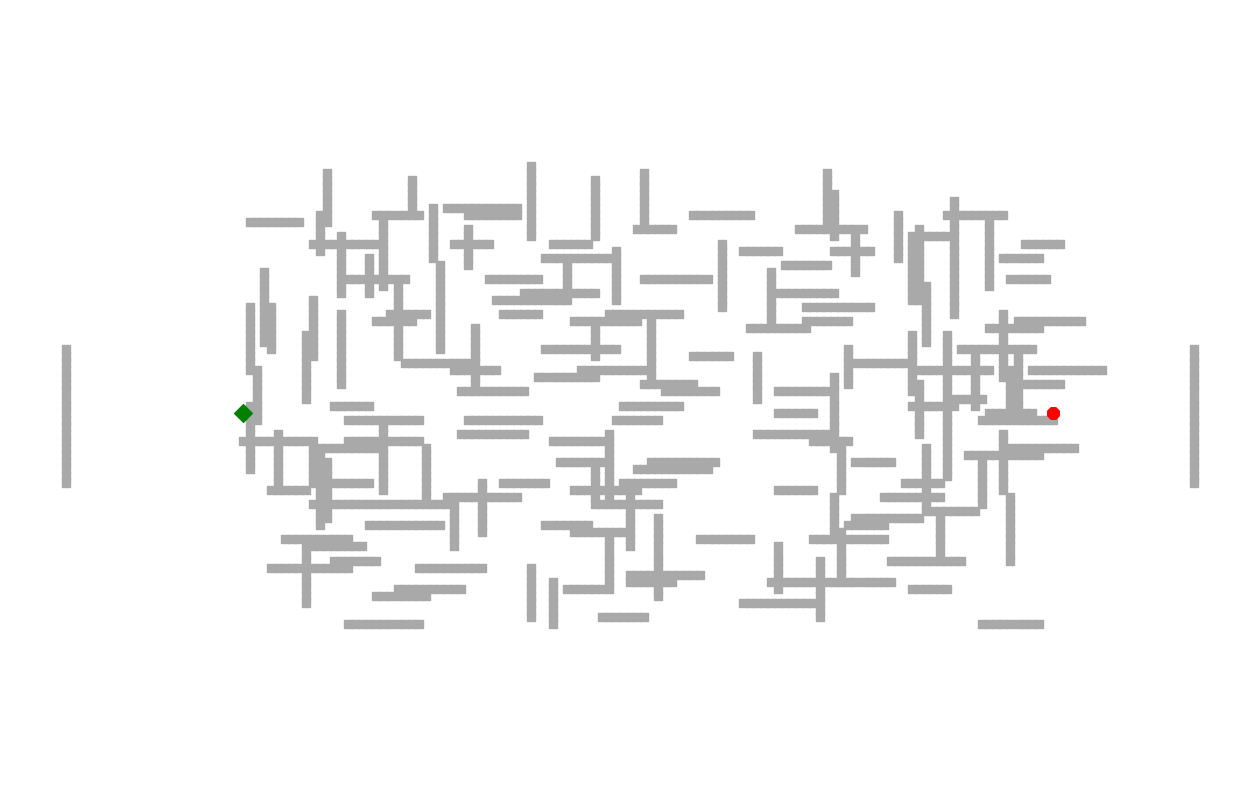

In [ ]:
plot_grid_problem(d3, solution=None, reached=None)

In [ ]:
def best_first_search(problem, f):
    "Search nodes with minimum f(node) value first."
    global reached
    node = Node(problem.initial)
    frontier = PriorityQueue([node], key=f)
    reached = {problem.initial: node}
    while frontier:
        node = frontier.pop()
        if problem.is_goal(node.state):
            return node
        for child in expand(problem, node):
            s = child.state
            if s not in reached or child.path_cost < reached[s].path_cost:
                reached[s] = child
                frontier.add(child)
    return failure

ÏúÑÏùò `best_first_search` Ìï®ÏàòÏóêÏÑú `reached` Î≥ÄÏàò `global`Î°ú Î≥ÄÍ≤Ω ÌõÑ ÏïÑÎûò ÏïåÍ≥†Î¶¨Ï¶òÏùò Í≤∞Í≥º ÏãúÍ∞ÅÌôî:

*   `uniform_cost_search`
*   `greedy_bfs`
*   `astar_search`
*   `weighted_astar_search`

Uniform cost search search: 154.2 path cost


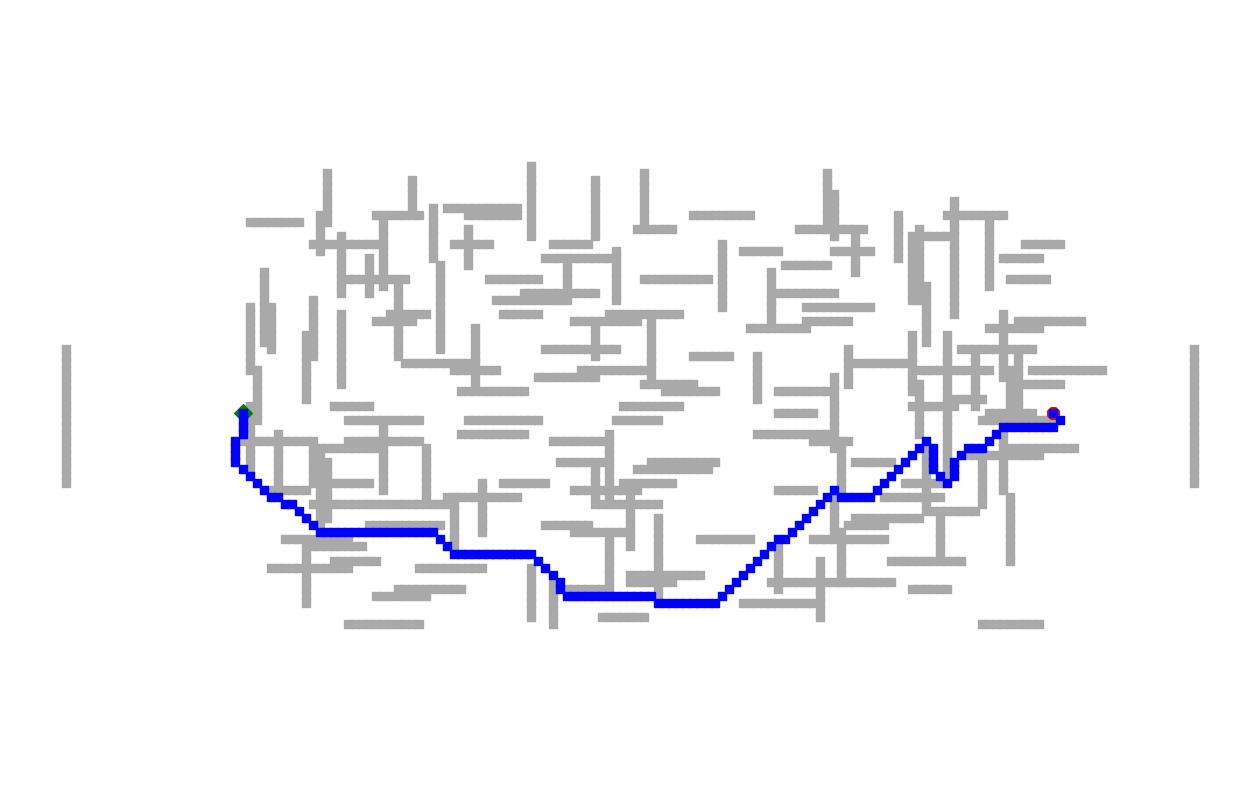

In [ ]:
# TODO 18
solution = uniform_cost_search(d3)
plot_grid_problem(d3, solution, reached=None, title='Uniform cost search')

Greedy BFS search: 164.5 path cost
448 states reached


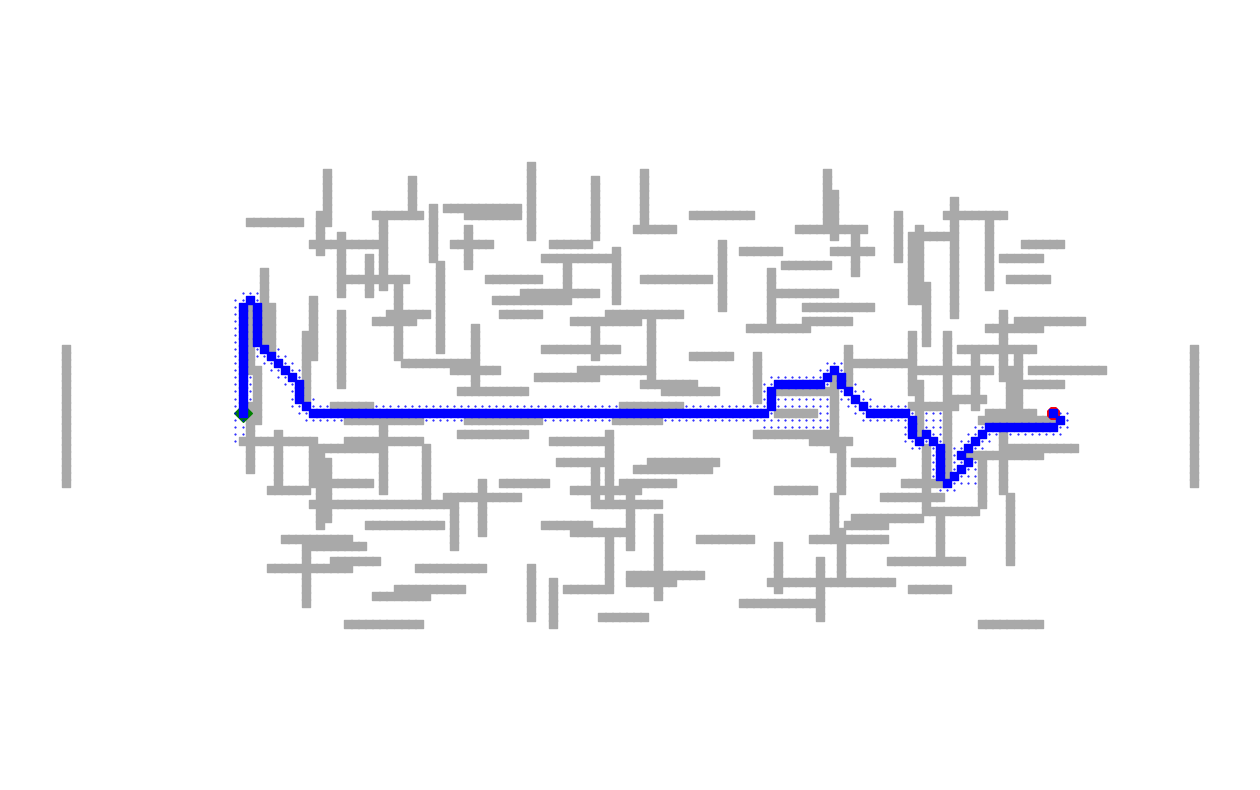

In [ ]:
# TODO 19
solution = greedy_bfs(d3)
plot_grid_problem(d3, solution, reached, 'Greedy BFS')

A* search search: 154.2 path cost
7,418 states reached


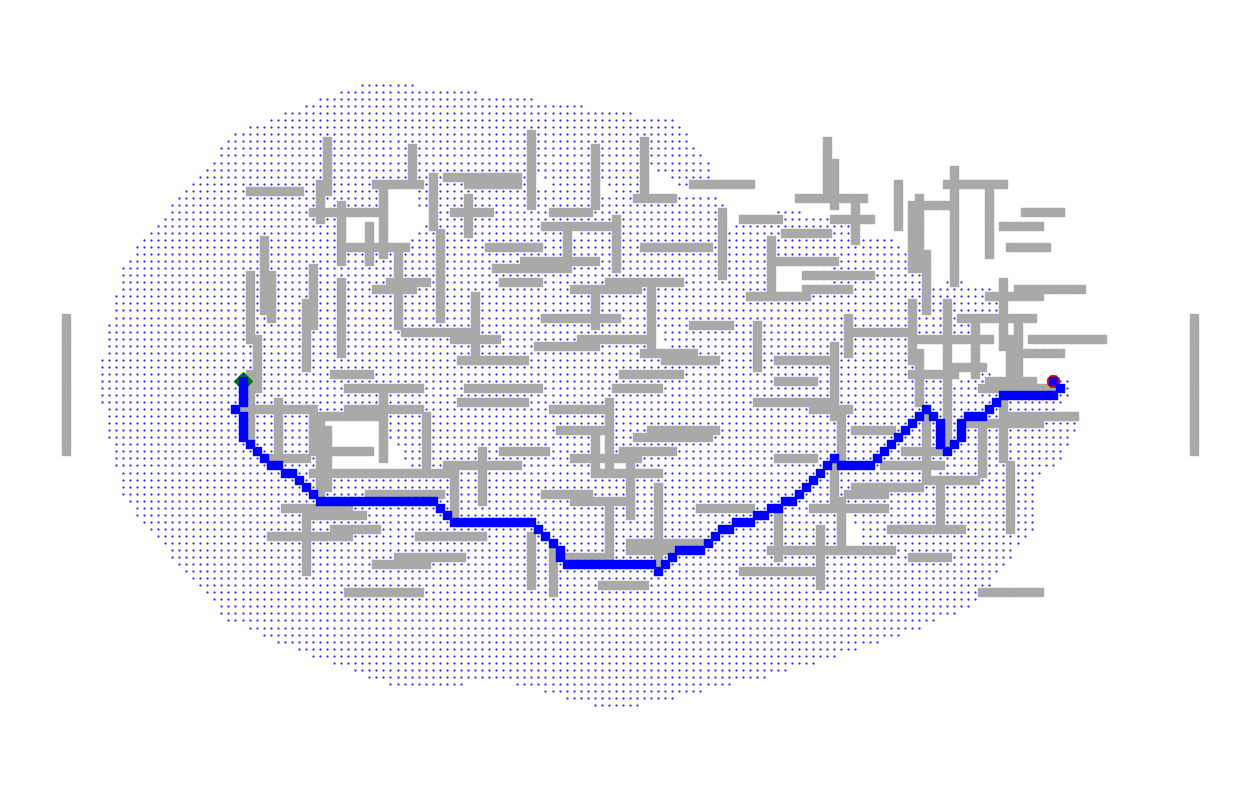

In [ ]:
# TODO 20
solution = astar_search(d3)
plot_grid_problem(d3, solution, reached, 'A* search')

Weighted A* search: 154.2 path cost
944 states reached


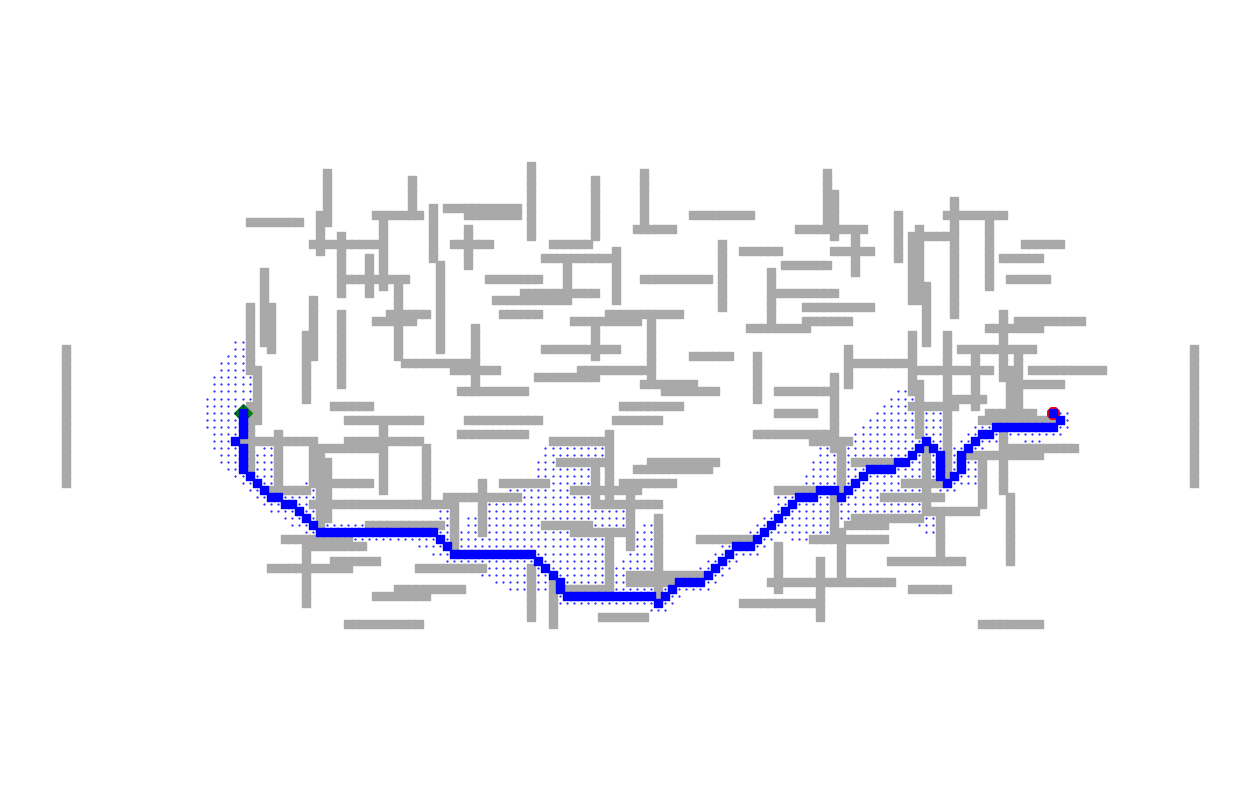

In [ ]:
# TODO 21
solution = weighted_astar_search(d3)
plot_grid_problem(d3, solution, reached, 'Weighted A*')

# Ïã§Ïäµ Í≥ºÏ†ú

* Î™®Îì† Î¨∏Ìï≠ Ìï¥Í≤∞Ïóê ÏÉùÏÑ±Ìòï AI ÏÇ¨Ïö© Í∞ÄÎä•

### 1Î≤à

9 √ó 9 ÌÅ¨Í∏∞Ïùò Í≤©Ïûê(grid)Í∞Ä Ï°¥Ïû¨ÌïúÎã§. Ïù¥ Í≤©ÏûêÏùò Í∞Å Ïπ∏ÏùÄ Îπ®Í∞ï ÌòπÏùÄ ÌååÎûëÏúºÎ°ú Ïπ†Ìï† Ïàò  ÏûàÎã§. Ï≤òÏùåÏóêÎäî Î™®Îì† Ïπ∏Ïù¥ ÌååÎûëÏúºÎ°ú Ïπ†Ìï¥Ï†∏ ÏûàÏßÄÎßå, ÏõêÌïòÎäî ÎåÄÎ°ú ÏÉâÏùÑ Î≥ÄÍ≤ΩÌï† Ïàò ÏûàÎã§.

Ïù¥ Í≤©ÏûêÎ•º 3 √ó 3 ÌÅ¨Í∏∞Ïù∏ ÏïÑÌôâÍ∞úÏùò ÏûëÏùÄ Í≤©Ïûê(subgrid)Î°ú ÎÇòÎàÑÏóàÏùÑ Îïå, Í∞Å ÏûëÏùÄ Í≤©ÏûêÎäî ÌïòÎÇòÏùò ÏÉâÏúºÎ°ú ÌÜµÏùºÎêòÏñ¥Ïïº ÌïòÎ©∞, Ïù∏Ï†ëÌïú ÏûëÏùÄ Í≤©ÏûêÎì§ÏùÄ ÏÑúÎ°ú Îã§Î•∏ ÏÉâÏùÑ Í∞ÄÏ†∏Ïïº ÌïúÎã§.

1.  ÏÉùÏÑ±Ìòï AIÏùÑ ÏÇ¨Ïö©Ìï¥ Ïù¥ Î¨∏Ï†úÏóê ÎåÄÌïú problem formulation(initial state, goal test, successor function, cost function)ÏùÑ ÏûëÏÑ±ÌïòÍ≥† Ïù¥ Î¨∏Ï†úÏùò state space ÌÅ¨Í∏∞Î•º Ï∂úÎ†•ÌïòÎèÑÎ°ù ÏöîÏ≤≠ÌïòÏãúÏò§.

  * ÏÉùÏÑ±Ìòï AIÏóê ÏûÖÎ†•Ìïú ÌîÑÎ°¨ÌîÑÌä∏ÏôÄ ÏÉùÏÑ±Ìòï AIÏùò Ï∂úÎ†•ÏùÑ Î∂ôÏó¨ÎÑ£Í≥†, ÎÇ¥Ïö©ÏùÑ Ï∞∏Í≥†ÌïòÏó¨ ÏùëÎãµÏùÑ ÏûëÏÑ±ÌïòÏãúÏò§. Ìï¥Îãπ ÎãµÏù¥ Ïò¨Î∞îÎ•∏ÏßÄ ÌèâÍ∞ÄÌïòÍ≥†, ÌèâÍ∞ÄÏóê ÎåÄÌïú Ïù¥Ïú†Î•º Ï†úÏãúÌïòÏãúÏò§.

2. Í∞Å Ïπ∏Ïùò ÏÉâÏùÑ Îã® Ìïú Î≤àÎßå ÏÉâÏπ†Ìï† Ïàò ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïúÎã§. Ïπ∏ÏùÑ Îëê Î≤à ÏÉâÏπ†ÌïòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥, 1) Ïù¥ÎØ∏ ÏÉâÏπ†Îêú Ï†ïÏÇ¨Í∞ÅÌòïÏùÑ Í∏∞Î°ùÌïòÏó¨ Îã§Ïãú ÏÉâÏπ†ÌïòÏßÄ Î™ªÌïòÎèÑÎ°ù ÌïòÍ±∞ÎÇò, 2) Î™®Îì† Ï†ïÏÇ¨Í∞ÅÌòïÏùÑ Í≥†Ï†ïÎêú ÏàúÏÑúÎ°ú ÏÉâÏπ†Ìï† Ïàò ÏûàÎã§.

  * ÏÉùÏÑ±Ìòï AIÏùÑ ÏÇ¨Ïö©Ìï¥ **Ïù¥ Îëê Í≤ΩÏö∞Ïóê ÎåÄÌï¥** problem formulation(initial state, goal test, successor function, cost function)ÏùÑ Îã§Ïãú **Í∞ÅÍ∞Å** ÏûëÏÑ±ÌïòÍ≥†, state spaceÏùò ÌÅ¨Í∏∞Î•º Îã§Ïãú **Í∞ÅÍ∞Å** Í≥ÑÏÇ∞ÌïòÏãúÏò§. Îëê ÏÉÅÌô© Ï§ë Ïñ¥Îäê Ï†ëÍ∑ºÏùò state space ÌÅ¨Í∏∞Í∞Ä Îçî ÏûëÏùÄÍ∞Ä?

    * ÏÉùÏÑ±Ìòï AIÏóê ÏûÖÎ†•Ìïú ÌîÑÎ°¨ÌîÑÌä∏ÏôÄ ÏÉùÏÑ±Ìòï AIÏùò Ï∂úÎ†•ÏùÑ Î∂ôÏó¨ÎÑ£Í≥†, ÎÇ¥Ïö©ÏùÑ Ï∞∏Í≥†ÌïòÏó¨ ÏùëÎãµÏùÑ ÏûëÏÑ±ÌïòÏãúÏò§. Ìï¥Îãπ ÎãµÏù¥ Ïò¨Î∞îÎ•∏ÏßÄ ÌèâÍ∞ÄÌïòÍ≥†, ÌèâÍ∞ÄÏóê ÎåÄÌïú Ïù¥Ïú†Î•º Ï†úÏãúÌïòÏãúÏò§.

3. Í∏∞Ï°¥ Î¨∏Ï†úÎäî Í≤©ÏûêÏùò Í∞Å Ïπ∏ ÌïòÎÇòÎ•º ÏÉâÏπ†ÌïòÎäî Í≤ΩÏö∞Î•º Í≥†Î†§ÌïòÏòÄÎã§. Í∑∏Îü∞Îç∞ Ïù¥Ï†ú Í∞Å ÏûëÏùÄ Í≤©Ïûê(subgrid)Í∞Ä Í∑†ÏùºÌïú ÏÉâÏúºÎ°ú Ïπ†Ìï¥ÏßÑ Í≤ΩÏö∞Î•º Í∞ÄÏ†ïÌïúÎã§.

  * ÏÉùÏÑ±Ìòï AIÏùÑ ÏÇ¨Ïö©Ìï¥ ÏúÑ ÏÉÅÌô©Ïóê ÎåÄÌïú problem formulation(initial state, goal test, successor function, cost function)ÏùÑ Îã§Ïãú ÏûëÏÑ±ÌïòÍ≥†, state spaceÏùò ÌÅ¨Í∏∞Î•º Îã§Ïãú Í≥ÑÏÇ∞ÌïòÏãúÏò§. ÏúÑ ÏÉÅÌô©Í∞ôÏù¥ Í∞úÎ≥Ñ Ïπ∏ÏùÑ Í≥†Î†§ÌïòÎäî Í≤É Î≥¥Îã§ Í∞Å ÏûëÏùÄ Í≤©ÏûêÎ•º Í≥†Î†§ÌïòÎäî Ï†ëÍ∑ºÏùò Ïù¥Ï†êÏùÄ Î¨¥ÏóáÏù∏Í∞Ä?

    * ÏÉùÏÑ±Ìòï AIÏóê ÏûÖÎ†•Ìïú ÌîÑÎ°¨ÌîÑÌä∏ÏôÄ ÏÉùÏÑ±Ìòï AIÏùò Ï∂úÎ†•ÏùÑ Î∂ôÏó¨ÎÑ£Í≥†, ÎÇ¥Ïö©ÏùÑ Ï∞∏Í≥†ÌïòÏó¨ ÏùëÎãµÏùÑ ÏûëÏÑ±ÌïòÏãúÏò§. Ìï¥Îãπ ÎãµÏù¥ Ïò¨Î∞îÎ•∏ÏßÄ ÌèâÍ∞ÄÌïòÍ≥†, ÌèâÍ∞ÄÏóê ÎåÄÌïú Ïù¥Ïú†Î•º Ï†úÏãúÌïòÏãúÏò§.

4. Ïù¥ Î¨∏Ï†úÏóêÎäî Î™áÍ∞úÏùò Ìï¥ÎãµÏù¥ Ï°¥Ïû¨ÌïòÎäîÍ∞Ä? Í∑∏ Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞Ä?

  * ÏÉùÏÑ±Ìòï AIÏóê ÏûÖÎ†•Ìïú ÌîÑÎ°¨ÌîÑÌä∏ÏôÄ ÏÉùÏÑ±Ìòï AIÏùò Ï∂úÎ†•ÏùÑ Î∂ôÏó¨ÎÑ£Í≥†, ÎÇ¥Ïö©ÏùÑ Ï∞∏Í≥†ÌïòÏó¨ ÏùëÎãµÏùÑ ÏûëÏÑ±ÌïòÏãúÏò§. Ìï¥Îãπ ÎãµÏù¥ Ïò¨Î∞îÎ•∏ÏßÄ ÌèâÍ∞ÄÌïòÍ≥†, ÌèâÍ∞ÄÏóê ÎåÄÌïú Ïù¥Ïú†Î•º Ï†úÏãúÌïòÏãúÏò§.



----ÏïÑÎûò ÎãµÎ≥Ä ÏûëÏÑ±----

# Î¨∏Ï†ú Ï†ïÎ¶¨
- Ï†ÑÏ≤¥ Í≤©Ïûê: 9Ìñâ * 9Ïó¥ = 81Í∞úÏùò ÏÖÄ

- Î¨∂Îäî Îã®ÏúÑ: 3*3 ÌÅ¨Í∏∞Ïùò Î∏îÎ°ù(subgrid)

- Î¨∂Îäî Î∞©Ïãù: 9Í∞úÏùò subgrid, 3*3

- Í≤∞Í≥º: Ï†ÑÏ≤¥Î•º 3Ìñâ 3Ïó¥Ïùò subgrid 9Í∞úÎ°ú Î∂ÑÌï†ÌïòÎäî Í≤É


# 1-1) ÏÉùÏÑ±Ìòï AI ÌîÑÎ°¨ÌîÑÌä∏ Î∞è Ï∂úÎ†•
Q. Ïù¥ Î¨∏Ï†úÏóê ÎåÄÌïú problem formulation(initial state, goal test, successor function, cost function)ÏùÑ ÏûëÏÑ±Ìï¥Î≥¥Í≥† Ïù¥ Î¨∏Ï†úÏùò state space ÌÅ¨Í∏∞Î•º Ï∂úÎ†•Ìï¥Î¥ê

A.

‚úÖ 1. Initial State (Ï¥àÍ∏∞ ÏÉÅÌÉú)
**9√ó9 Í≤©Ïûê(grid)**Ïùò Î™®Îì† Ïπ∏Ïù¥ ÌååÎûë(B) ÏúºÎ°ú Ï±ÑÏõåÏßÑ ÏÉÅÌÉú
Îî∞ÎùºÏÑú Í∞Å subgrid 9Í∞ú Î™®ÎëêÍ∞Ä ÌòÑÏû¨Îäî ÌååÎûëÏÉâÏúºÎ°ú Ï±ÑÏõåÏ†∏ ÏûàÏùå

‚úÖ 2. Goal Test (Î™©Ìëú ÏÉÅÌÉú ÌåêÎ≥Ñ)
Îã§Ïùå Ï°∞Í±¥ÏùÑ Î™®Îëê ÎßåÏ°±ÌïòÎäî ÏÉÅÌÉúÎ•º GoalÎ°ú Î≥∏Îã§:

Í∞Å 3√ó3 subgridÎäî Î™®Îëê ÎèôÏùºÌïú ÏÉâÏù¥Ïñ¥Ïïº ÌïúÎã§. (Ï¶â, ÌïòÎÇòÏùò subgridÎäî Ïò§ÏßÅ R ÎòêÎäî B Ï§ë ÌïòÎÇòÎ°úÎßå Ïπ†Ìï¥Ï†∏Ïïº Ìï®)
ÏÑúÎ°ú Ïù∏Ï†ëÌïú subgridÎäî ÏÑúÎ°ú Îã§Î•∏ ÏÉâÏù¥Ïñ¥Ïïº ÌïúÎã§.
Ïù∏Ï†ëÏù¥ÎûÄ ÏÉÅÌïòÏ¢åÏö∞Î°ú Ïó∞Í≤∞Îêú subgridÎßå Ìï¥ÎãπÎê® (ÎåÄÍ∞ÅÏÑ†ÏùÄ Ïù∏Ï†ë ÏïÑÎãò)

‚úÖ 3. Successor Function (ÏÉÅÌÉú Ï†ÑÏù¥ Ìï®Ïàò)
ÌòÑÏû¨ ÏÉÅÌÉúÏóêÏÑú Í∞ÄÎä•Ìïú Îã§Ïùå ÏÉÅÌÉúÎ•º Î∞òÌôòÌï®.
Ï¶â, Í∞Å subgridÏóê ÎåÄÌï¥ ÏÉâÏùÑ ÌïòÎÇòÏî© Ï†ïÌï¥Ï£ºÎäî Î∞©Ïãù
Í∞ÄÎä•Ìïú ÏÉâ: Îπ®Í∞ï(R), ÌååÎûë(B)
Îã®, Ïù¥ÎØ∏ ÏÉâÏù¥ Ï†ïÌï¥ÏßÑ subgridÎäî Î≥ÄÍ≤Ω Î∂àÍ∞Ä

‚úÖ 4. Cost Function (ÎπÑÏö© Ìï®Ïàò)
Î™®Îì† Ïù¥ÎèôÏùò ÎπÑÏö©ÏùÄ ÎèôÏùºÌïòÎã§Í≥† Í∞ÄÏ†ï ‚Üí Uniform Cost (1 per move)
Ï¶â, Îã®ÏàúÌûà goalÏóê ÎèÑÎã¨ÌïòÎäî Í≤ÉÏù¥ Î™©Ï†ÅÏù¥ÎùºÎ©¥ ÎπÑÏö©ÏùÄ ÏÉÅÌÉú ÍπäÏù¥ÏôÄ ÎèôÏùº

üì¶ State Space Ï†ïÏùò

Ïù¥Ï†ú ÏÉÅÌÉú Í≥µÍ∞ÑÏùò ÌÅ¨Í∏∞Î•º Í≥ÑÏÇ∞Ìï¥Î≥¥Ïûê.

üî∏ Key Í¥ÄÏ∞∞:
Í∞Å subgridÎäî Ï†ÑÏ≤¥Í∞Ä ÎèôÏùºÌïú ÏÉâÏù¥Ïñ¥Ïïº ÌïòÎØÄÎ°ú,
Í≤©Ïûê Ï†ÑÏ≤¥Ïùò ÏÉÅÌÉúÎäî Îã®ÏàúÌûà 9Í∞úÏùò subgridÍ∞Ä Ïñ¥Îñ§ ÏÉâÏù∏ÏßÄÎ°ú ÌëúÌòÑ Í∞ÄÎä•Ìï®.
Í∞Å subgridÎäî R ÎòêÎäî B ‚Üí Í∞ÄÎä•Ìïú ÏÉÅÌÉúÎäî 2Í∞úÏùò ÏÉâ Ï§ë ÌïòÎÇò
Îã®, Î™®Îì† Í≤ΩÏö∞Í∞Ä goal stateÍ∞Ä ÏïÑÎãò (Ï†úÏïΩ Ï°∞Í±¥ Ï°¥Ïû¨)
‚ùå Ï¥ù ÏÉÅÌÉú Ïàò (Ï†úÏïΩ Ï°∞Í±¥ ÏóÜÎäî Í≤ΩÏö∞)
ÏÉâÏù¥ Îëê Í∞ÄÏßÄ(R, B), subgridÍ∞Ä 9Í∞ú ‚Üí
Ï†ÑÏ≤¥ Í∞ÄÎä•Ìïú ÏÉÅÌÉú ÏàòÎäî:
2^9=512


A.Í≤∞Î°†

Î¨∏Ï†úÏóêÏÑú Ï†ïÏùòÌñàÎìØÏù¥, ÏÉÅÌÉúÎäî 9ÏõêÏÜå ÌäúÌîå. Ï¥àÍ∏∞ ÏÉÅÌÉúÎäî Î™®Îì† Ïπ∏Ïù¥ ÌååÎûÄÏÉâÏùÑ Ïπ†Ìï¥Ï†∏ ÏûàÎäî ÏÉÅÌÉúÎã§. Ïö∞Î¶¨Ïùò Î™©ÌëúÎäî Í∞Å 3*3Ïùò Í∞ÅÏπ∏ÏùÑ ÏÉâÏπ†ÌïòÎêò Ïù∏Ï†ëÌïú Ïπ∏ÏùÄ ÏÑúÎ°ú Îã§Î•∏ ÏÉâÏúºÎ°ú Ïπ†ÌïòÎäîÍ≤å Î™©ÌëúÏù¥ÎØÄÎ°ú goal testÏó≠ÏãúÎèÑ Ïò¨Î∞îÎ•¥Îã§Í≥† Î≥º Ïàò ÏûàÎã§. Í∞Å Í≤©ÏûêÎ•º ÏÑúÎ°ú Îã§Î•∏ ÏÉâÏúºÎ°ú ÏÉâÏπ†ÏùÑ ÌïòÍ≥† ÌõÑÏÜçÏ†ÅÏúºÎ°ú Ìï† Ïàò ÏûàÎäî ÏûëÏóÖÏùÄ ÏÉâÏπ†Îêú Í≤©ÏûêÎ•º Îã§Î•∏ ÏÉâÏúºÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏù¥Îã§.
Î¨∏Ï†úÏóêÏÑú ÎπÑÏö©Ìï®ÏàòÎäî Îî∞Î°ú Ï†ïÏùòÎêòÏßÄ ÏïäÏïòÏúºÎØÄÎ°ú ÏÉùÏÑ±Ìòï AIÏùò Ï∂úÎ†•Ïù¥ ÌÉÄÎãπÌïòÍ≥† ÌåêÎã®ÌïòÍ∏¥ Ïñ¥Î†µÎã§.

Í≤∞Íµ≠ Ïù¥Îü¨Ìïú problem formulationÏùÑ Ï∞∏Í≥†Ìï¥ÏÑú AIÍ∞Ä Ï∂úÎ†•Ìïú state spaceÎäî 2Ïùò9ÏäπÏúºÎ°ú 512Í∞Ä ÎßûÎã§. Ïù∏Ï†ëÌïú Í≤©ÏûêÏùò ÏÉâÏù¥ Îã¨ÎùºÏïº ÌïúÎã§Îäî Í≤ÉÏùÄ ÌçºÏ¶êÏùò Ïñ¥Îñ§ ÏÉÅÌÉúÍ∞Ä goal stateÏù∏ÏßÄ ÌåêÎ≥ÑÌïòÎäî Í≤ÉÏù¥ÏßÄ ÌÉêÏÉâÌïòÎäî ÏÉÅÌÉúÍ≥µÍ∞ÑÏùÑ Ï§ÑÏù¥Îäî Í≤ÉÏóê ÏòÅÌñ•ÏùÑ ÎÅºÏπòÎäî Í≤ÉÏùÄ ÏïÑÎãàÍ∏∞ ÎïåÎ¨∏Ïóê, Îòê Í∞Å 3*3 subgridÎäî ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Î™®Îëê Í∞ôÏùÄ ÏÉâÏù¥Ïñ¥Ïïº ÌïòÎØÄÎ°ú Ïò¨Î∞îÎ•¥Îã§Í≥† Î≥º Ïàò ÏûàÎã§.  




# 1-2) ÏÉùÏÑ±Ìòï AI ÌîÑÎ°¨ÌîÑÌä∏ Î∞è Ï∂úÎ†•
Q.
 Ïûê Í∑∏Îüº Ïù¥ Î¨∏Ï†úÏóêÏÑú Í∞Å Ïπ∏Ïùò ÏÉâÏùÑ Îã® Ìïú Î≤àÎßå ÏÉâÏπ†Ìï† Ïàò ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï¥Î≥¥Ïûê. Ïπ∏ÏùÑ ÎëêÎ≤à ÏÉâÏπ†ÌïòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Ï≤´Î≤àÏß∏Î°ú Ïù¥ÎØ∏ ÏÉâÏπ†Îêú Ï†ïÏÇ¨Í∞ÅÌòïÏùÑ Í∏∞Î°ùÌïòÏó¨ Îã§Ïãú ÏÉâÏπ†ÌïòÏßÄ Î™ªÌïòÎèÑÎ°ù ÌïòÍ±∞ÎÇò Î™®Îì† Ï†ïÏÇ¨Í∞ÅÌòïÏùÑ Í≥†Ï†ïÎêú ÏàúÏÑúÎ°ú ÏÉâÏπ† Ìï† Ïàò ÏûàÏñ¥ Ïù¥ Ï°∞Í±¥ÏùÑ Ï∂îÍ∞ÄÌï¥ÏÑú problem formulation(initial state, goal test, successor function, cost function)Í≥º state spaceÏùò ÌÅ¨Í∏∞Î•º Îëê Í≤ΩÏö∞ Í∞ÅÍ∞Å Í≥ÑÏÇ∞Ìï¥Î¥ê


**A-1(Ïù¥ÎØ∏ ÏÉâÏπ†Îêú Ïπ∏ Í∏∞Î°ù)**

ÏÉâÏπ† ÏàúÏÑúÎ•º ÏûêÏú†Î°≠Í≤å Ï†ïÌïòÍ≥†, Ïù¥ÎØ∏ ÏÉâÏπ†Îêú Ïπ∏ÏùÄ Îã§Ïãú ÏÉâÏπ†Ìï† Ïàò ÏóÜÎèÑÎ°ù Í∏∞Î°ùÌïúÎã§.‚Äù

1. Initial State
Î™®Îì† Ïπ∏Ïù¥ ÎØ∏ÏÉâÏπ† ÏÉÅÌÉú.
visited(ÌòπÏùÄ colored) ÏßëÌï©(ÎòêÎäî Îßµ) = ÎπÑÏñ¥ ÏûàÏùå (Ï¶â, ÏïÑÏßÅ ÏïÑÎ¨¥ Ïπ∏ÎèÑ Ïπ†ÌïòÏßÄ ÏïäÏùå).
2. Goal Test
81Ïπ∏ Î™®Îëê ÏÉâÏπ†Ïù¥ ÏôÑÎ£åÎê®.
Î™®Îì† 3√ó3 subgridÎäî ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú ÌïòÎÇòÏùò ÏÉâÏúºÎ°úÎßå Íµ¨ÏÑ±.
Ïù∏Ï†ë subgridÎÅºÎ¶¨Îäî ÏÉâÏù¥ Îã¨ÎùºÏïº Ìï®.
3. Successor Function
ÎØ∏ÏÉâÏπ†Ïù∏ Ïπ∏ Ï§ë ÌïòÎÇòÎ•º ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌïúÎã§.
Í∑∏ Ïπ∏ÏùÑ Îπ®Í∞ï(R) ÎòêÎäî ÌååÎûë(B) Ï§ë ÌïòÎÇòÎ°ú Ïπ†ÌïúÎã§.
Ìï¥Îãπ Ïπ∏ÏùÑ visitedÏóê Îì±Î°ù(‚ÄúÏù¥ÎØ∏ ÏÉâÏπ†ÎêêÎã§‚ÄùÍ≥† Í∏∞Î°ù).
Ïù¥ÎØ∏ visitedÏóê ÏûàÎäî Ïπ∏(Ï¶â, ÏÉâÏπ†Îêú Ïπ∏)ÏùÄ Îã§Ïãú ÏÉâÏπ† Î∂àÍ∞ÄÎä•.
Ï¶â, Ïñ¥Îñ§ ÏãúÏ†êÏóêÏÑúÎì† ÏïÑÏßÅ Ïπ†ÌïòÏßÄ ÏïäÏùÄ Ïπ∏ÏùÑ Í≥®Îùº 2Í∞ÄÏßÄ ÏÉâ Ï§ë ÌïòÎÇòÎ°ú Ïπ†ÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÏÉà ÏÉÅÌÉúÎ•º ÎßåÎì†Îã§.

4. Cost Function
Ïπ∏ 1Í∞ú ÏÉâÏπ†Ìï† ÎïåÎßàÎã§ ÎπÑÏö©ÏùÑ 1Î°ú ÎëîÎã§.
Ï†ÑÏ≤¥ 81Ïπ∏ÏùÑ Î™®Îëê ÏÉâÏπ† ÏôÑÎ£åÌïòÎ©¥, Ï¥ù ÎπÑÏö©ÏùÄ 81Ïù¥ Îê† Í≤ÉÏù¥Îã§.
5. State Space ÌÅ¨Í∏∞
Ï§ëÍ∞Ñ ÏÉÅÌÉúÍπåÏßÄ Ìè¨Ìï®ÌïòÏó¨ ‚Äú(ÎØ∏ÏÉâÏπ† / R / B)‚ÄùÎ•º Í∞Å Ïπ∏Ïù¥ Í∞ÄÏßà Ïàò ÏûàÎã§Í≥† Î≥¥Î©¥,
Ïù¥Î°†ÏÉÅ ÏÉÅÌÉú ÏàòÎäî
3
81

 .
(Í∞Å Ïπ∏ÎßàÎã§ 3Í∞ÄÏßÄ ÏÉÅÌÉú: Ïïà Ïπ†Ìï® / R / B)




**A-2(Í≥†Ï†ïÎêú ÏàúÏÑúÎ°ú Ïπ∏ ÏÉâÏπ†)**

‚ÄúÏôºÏ™Ω ÏúÑ Ïπ∏Î∂ÄÌÑ∞ Ïò§Î•∏Ï™Ω ÏïÑÎûò Ïπ∏ÍπåÏßÄ Í≥†Ï†ïÎêú ÏàúÏÑúÎ°ú ÏÉâÏπ†ÌïúÎã§.‚Äù

1. Initial State
Î™®Îì† Ïπ∏ ÎØ∏ÏÉâÏπ† ÏÉÅÌÉú.
ÌòÑÏû¨ ÏÉâÏπ†Ìï¥Ïïº Ìï† Ïπ∏Ïùò Ïù∏Îç±Ïä§Î•º 0Ïù¥Îùº ÎëîÎã§.
(Ïòà: (0,0)ÏùÑ 0Î≤à Ïπ∏, (0,1)ÏùÑ 1Î≤à Ïπ∏ ‚Ä¶ (8,8)ÏùÑ 80Î≤à Ïπ∏ Îì±ÏúºÎ°ú Îß§Ìïë)
2. Goal Test
81Î≤àÏß∏ Ïπ∏(Ïù∏Îç±Ïä§ 80)ÍπåÏßÄ ÏÉâÏπ†ÏùÑ ÎßàÏ≥§Í≥†,
Î™®Îì† 3√ó3 subgridÍ∞Ä Îã®Ïùº ÏÉâÏù¥Î©∞,
Ïù∏Ï†ë subgridÎÅºÎ¶¨Îäî ÏÑúÎ°ú Îã§Î•∏ ÏÉâ.
3. Successor Function
ÌòÑÏû¨ Ïù∏Îç±Ïä§ iÏùò Ïπ∏ÏùÑ R ÎòêÎäî B Ï§ë ÌïòÎÇòÎ°ú Ïπ†ÌïúÎã§.
iÎ•º i+1Î°ú Ï¶ùÍ∞ÄÏãúÏºú ‚ÄúÎã§Ïùå Ïπ∏‚ÄùÏúºÎ°ú Ïù¥Îèô.
Ïù¥ÎØ∏ ÏÉâÏπ† ÏôÑÎ£åÌïú Ïù∏Îç±Ïä§ iÎ°ú ÎêòÎèåÏïÑÍ∞ÄÏÑú ÎçÆÏñ¥Ïì∞Í∏∞ Î∂àÍ∞Ä(Ìïú Î≤àÎßå ÏÉâÏπ†).
Ï¶â, (i=0) ‚Üí (i=1) ‚Üí ‚Ä¶ ‚Üí (i=80) ÏàúÏúºÎ°ú ÏùºÎ∞©ÌÜµÌñâÌïòÎ©∞ ÏÉâÏπ†ÏùÑ ÏßÑÌñâÌïúÎã§.

4. Cost Function
Ïπ∏ 1Í∞ú ÏÉâÏπ† Ïãú ÎπÑÏö© 1.
81Ïπ∏ Î™®Îëê ÏÉâÏπ†ÌïòÎ©¥ ÎπÑÏö© 81.
5. State Space ÌÅ¨Í∏∞
Ï§ëÍ∞Ñ ÏÉÅÌÉúÎ•º ‚ÄúiÎ≤àÏß∏ Ïπ∏ÍπåÏßÄ ÏÉâÏπ† ÏôÑÎ£å, ÎÇòÎ®∏ÏßÄÎäî ÎØ∏ÏÉâÏπ†‚ÄùÏù¥ÎùºÍ≥† Î≥º Îïå,
Í∞Å Ïπ∏ÏùÄ R ÎòêÎäî B ‚Üí iÎ≤àÏß∏ Ïπ∏ÍπåÏßÄ ÏÉâÏπ†Îêú Í≤ΩÏö∞Ïùò ÏàòÎäî
2
i
2
i
 .
iÎäî 0ÏóêÏÑú 81ÍπåÏßÄ Ï¶ùÍ∞Ä.
Îî∞ÎùºÏÑú Î™®Îì† Ï§ëÍ∞Ñ ÏÉÅÌÉú Í∞úÏàòÎäî
‚àë
i
=
0
81
2
i

=

2
82
‚àí
1.
i=0
‚àë
81
‚Äã
 2
i
 =2
82
 ‚àí1.
Ïù¥ÏôÄ Îã¨Î¶¨ ÏµúÏ¢Ö Í≤∞Í≥º(81Ïπ∏Ïù¥ Ï†ÑÎ∂Ä ÏÉâÏπ†Îêú ÏôÑÏÑ± ÏÉÅÌÉú)Îßå Î≥¥Î©¥ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú
2^81

Í∞ÄÏßÄÍ∞Ä Í∞ÄÎä•ÌïòÎã§.



# Í≤∞Î°†

Îëê Í≤ΩÏö∞Î•º ÎπÑÍµêÌïòÎ©¥ Í≥†Ï†ïÎêú ÏàúÏÑúÎ°ú Ïπ∏ÏùÑ ÏÉâÏπ†ÌïòÎäî 2Î≤àÏß∏ Î∞©ÏãùÏù¥ state spaceÍ∞Ä Îçî ÏûëÎã§. Îëê Í≤ΩÏö∞ Î™®Îëê Ïû¨Ïπ†Ïù¥ Î∂àÍ∞ÄÎä•ÌïòÎã§Îäî Ï†úÏïΩÏùÄ ÎèôÏùºÌïòÏßÄÎßå
Ï≤´ Î≤àÏß∏ Í≤ΩÏö∞Îäî ÏïÑÏßÅ ÏÉâÏπ†ÎêòÏßÄ ÏïäÏùÄ Í≤©Ïûê(Ïã§Ï†úÎ°úÎäî ÌååÎûëÏÉâÏúºÎ°ú ÏÉâÏπ†ÎêòÏñ¥ÏûàÏùå)ÏùÄ(Îäî)Ïñ¥Îäê Í≤ÉÏù¥Îì† Í≥®ÎùºÏÑú ÏÉâÏùÑ Ïπ†Ìï† Ïàò ÏûàÍ≥† Ïù¥Î•º Í∏∞Î°ùÌïúÎã§. Ïù¥Îïå Ï≤´ Î≤àÏß∏ Í≤ΩÏö∞Îäî ÏïÑÎ¨¥ ÌñâÎèôÎèÑ ÌïòÏßÄ ÏïäÎäî None, ÌååÎûë, Îπ®Í∞ïÏùÑ Ïπ†ÌïòÎäî ÌñâÎèôÏùÑ Ìï† Ïàò ÏûàÎäî 3Ïùò 81ÏäπÏùò state spaceÍ∞Ä ÎÇòÏò§Îäî Í≤ÉÏù¥ ÎßûÍ≥†. Îëê Î≤àÏß∏ Í≤ΩÏö∞Îäî Ïπ†Ìï† ÏàúÏÑúÎ•º Í≥†Ï†ïÌï¥ Îë†ÏúºÎ°úÏç® Í∑∏ ÏãúÏ†êÏóê Ïπ†Ìï† Í≤∞ÏûêÎ•º Îπ®Í∞ï ÎòêÎäî ÌååÎûë ÏúºÎ°ú Í≤∞Ï†ïÌïòÎäî ÎëêÍ∞ÄÏßÄ ÏÑ†ÌÉùÏßÄ ÎøêÏù¥Í≥†, Í≥µÌÜµ Ï†úÏïΩ Ï°∞Í±¥ÏúºÎ°úÏç® ÌïúÎ≤à Ïπ†Ìïú Í≤©ÏûêÎäî Ïπ†Ìï† Ïàò ÏóÜÏúºÎãà state spaceÎäî 1(ÏïÑÎ¨¥ÌñâÎèôÎèÑ ÌïòÏßÄ ÏïäÏùå)+2(Ï≤´Î≤àÏß∏ Í≤©ÏûêÎ•º Îπ®Í∞ï ÎòêÎäî ÌååÎûëÏúºÎ°ú Ïπ†Ìï®) +2Ïùò2Ïäπ+....+2Ïùò81Ïäπ= state spaceÍ∞Ä ÎÇòÏò®Îã§.

Ï¶â Í≥†Ï†ïÎêú ÏàúÏÑú ÏóÜÏù¥ ÏûêÏú†Î°≠Í≤å ÏÉâÏπ†ÌïòÍ≥† Ïù¥Î•º Í∏∞Î°ùÌïòÎäî Í≤ΩÏö∞Îäî Í∞Å Í≤©ÏûêÎãπ 3Í∞ÄÏßÄ Í≤ΩÏö∞Î•º Î∞∞Ï†ïÌï¥ ÎÇòÍ∞ÄÏÑú Ìõ®Ïî¨ ÎßéÏùÄ ÏÉÅÌÉúÍ∞Ä ÏÉùÍ∏∞Îäî Í≤ÉÏù¥ ÎßûÍ≥†, ÏàúÏÑúÎ•º Ï†ïÌï¥ÎëêÎäî Îëê Î≤àÏß∏ Í≤ΩÏö∞Îäî Í∞Å ÏàúÏÑúÏóê ÎßûÎäî Í≤©ÏûêÎãπ 2Í∞ÄÏßÄ ÏÉâ Ï§ë ÌïòÎÇòÎ•º Í≥†Î•¥Îäî Ïù¥ÏßÄ ÏÑ†Îã§Î°ú stateÍ∞Ä ÌÉêÏÉâÎêòÍ∏∞ ÎïåÎ¨∏Ïóê 1Î≤àÏóê ÎπÑÌï¥ Ï†ÑÏ≤¥ ÏÉÅÌÉúÍ≥µÍ∞ÑÏù¥ Ìõ®Ïî¨ Ï†ÅÏñ¥ÏßÄÎäî Í≤ÉÏù¥Îã§. Îî∞ÎùºÏÑú 2Î≤àÏß∏ Í≤ΩÏö∞Í∞Ä state spaceÍ∞Ä Îçî Ï†ÅÎã§Îäî  AIÏùò ÎãµÎ≥ÄÏùÄ ÌÉÄÎãπÌïòÎã§.






# 1-3) ÏÉùÏÑ±Ìòï AI ÌîÑÎ°¨ÌîÑÌä∏ Î∞è Ï∂úÎ†•

Q. ÏßÄÍ∏àÍπåÏßÄÏùò Î¨∏Ï†úÎäî Í≤©ÏûêÏùò Í∞Å Ïπ∏ ÌïòÎÇòÎ•º ÏÉâÏπ†ÌïòÎäî Í≤ΩÏö∞Î•º Í≥†Î†§ÌñàÏûñÏïÑ. Í∑∏Îü∞Îç∞ Ïù¥Ï†úÎäî Í∞Å ÏûëÏùÄ Í≤©ÏûêÍ∞Ä Í∑†ÏùºÌïú ÏÉâÏúºÎ°ú Ïπ†Ìï¥ÏßÑ Í≤ΩÏö∞Î•º Í∞ÄÏ†ïÌï¥Î≥ºÍ∫ºÏïº Ïù¥ ÏÉÅÌô©Ïóê ÎåÄÌï¥ problem formulation(initial state, goal test, successor function, cost function)ÏùÑ Îã§Ïãú ÏûëÏÑ±ÌïòÍ≥†, state spaceÏùò ÌÅ¨Í∏∞Î•º Îã§Ïãú Í≥ÑÏÇ∞Ìï¥Î¥ê Í∑∏Î¶¨Í≥† Ïù¥ Ï†ëÍ∑º Î∞©ÏãùÏùò Ïù¥Ï†êÏùÄ Î≠òÍπå?



A.

2.Problem Formulation

2.1. State(ÏÉÅÌÉú)Ïùò ÌëúÌòÑ
StateÎ•º ‚Äú9Í∞úÏùò subgrid Í∞ÅÍ∞ÅÏù¥ (ÎØ∏Ï†ï / R / B) Ï§ë Ïñ¥Îñ§ ÏÉÅÌÉúÏù∏ÏßÄ‚ÄùÎ°ú Ï†ïÏùòÌï† Ïàò ÏûàÏùå.
ÌÉêÏÉâ ÎèÑÏ§ëÏóêÎäî ÏïÑÏßÅ ÏÉâÏù¥ Ï†ïÌï¥ÏßÄÏßÄ ÏïäÏùÄ subgridÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÍ∏∞Ïóê,
Í∞Å subgridÍ∞Ä
{
uncolored
,
R
,
B
}
{uncolored,R,B} ÏÖã Ï§ë ÌïòÎÇòÎ•º Í∞ÄÏßà Ïàò ÏûàÎã§Í≥† Î≥¥Î©¥ Îê®.

2.2. Initial State
9Í∞ú subgridÍ∞Ä Ï†ÑÎ∂Ä ‚ÄòÎØ∏Ï†ï‚Äô(uncolored) ÏÉÅÌÉúÎ°ú ÏãúÏûëÌïúÎã§.

2.3. Goal Test

9Í∞ú subgridÍ∞Ä Î™®Îëê R ÎòêÎäî BÎ°ú ÏÉâÏù¥ Ï†ïÌï¥Ï°åÏúºÎ©∞,
Ïù∏Ï†ë subgridÎÅºÎ¶¨Îäî ÏÑúÎ°ú Îã§Î•∏ ÏÉâÏùÑ Í∞ÄÏßÑÎã§.
(subgrid ÎÇ¥Î∂Ä Í∑†Ïùº ÏÉâÏùÄ Ïù¥ÎØ∏ Í∞Å subgrid Ï†ÑÏ≤¥Î•º R/BÎ°ú Í≤∞Ï†ïÌïòÎäî Í≤ÉÏù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§ÎüΩÍ≤å Ï∂©Ï°±)

2.4. Successor Function
ÏïÑÏßÅ ÏÉâÏù¥ Ï†ïÌï¥ÏßÄÏßÄ ÏïäÏùÄ subgrid Ï§ë ÌïòÎÇòÎ•º Í≥®Îùº,
R ÎòêÎäî B Ï§ë ÌïòÎÇòÎ•º Ìï†Îãπ(ÏÉâÏπ†)ÌïúÎã§.
Ïù¥Î†áÍ≤å Ìï¥ÏÑú Îã§Ïùå ÏÉÅÌÉúÎ•º ÏÉùÏÑ±ÌïúÎã§.
Ï¶â, Ìïú Î≤àÏùò ‚ÄúÏù¥Îèô(move)‚ÄùÎäî **‚ÄúÌäπÏ†ï subgridÏóê R ÎòêÎäî B ÏÉâÏùÑ Ï†ïÌï¥Ï£ºÎäî Í≤É‚Äù**Ïù¥ÎùºÍ≥† Î≥º Ïàò ÏûàÏùå.

2.5. Cost Function
ÏùºÎ∞òÏ†ÅÏúºÎ°ú Í∞Å subgridÏóê ÏÉâÏùÑ Ï†ïÌïòÎäî Îç∞ ÎπÑÏö© 1Î°ú Îëò Ïàò ÏûàÎã§.
ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú 9Í∞ú subgridÎ•º Î™®Îëê Ïπ†ÌïòÎ©¥ ÎπÑÏö©Ïùò Ìï©ÏùÄ 9Í∞Ä Îê®.
(Î¨ºÎ°† Îã§Î•∏ Î∞©ÏãùÏúºÎ°ú CostÎ•º Ï†ïÏùòÌï¥ÎèÑ Î¨¥Î∞©ÌïòÎÇò, Î≥¥ÌÜµ Í∑†Îì± ÎπÑÏö©ÏùÑ ÎßéÏù¥ Í∞ÄÏ†ï)

3. State Space ÌÅ¨Í∏∞

3.1. Ï†ÑÏ≤¥ Í∞ÄÎä•Ìïú ÏÉÅÌÉú(Î∂ÄÎ∂Ñ Ìè¨Ìï®)
Í∞ÅÍ∞ÅÏùò subgridÍ∞Ä ‚ÄúÎØ∏Ï†ï / R / B‚Äù 3Í∞ÄÏßÄ Ï§ë ÌïòÎÇòÎ•º Í∞ÄÏßà Ïàò ÏûàÎã§Í≥† Î≥¥Î©¥,
Í∞ÄÎä•Ìïú Î™®Îì† Ï°∞Ìï©ÏùÄ
3
9
 .
(3√ó3√ó...√ó3, 9Î≤à Í≥±)
3.2. ÏôÑÏÑ±Îêú ÏÉâ Î∞∞Ïπò(Goal ÌõÑÎ≥¥)Îßå ÎÜìÍ≥† Î≥¥Î©¥
Î™®Îì† subgridÍ∞Ä R ÎòêÎäî BÎ°ú Í≤∞Ï†ï ‚Üí
2
9
=
512

Ïù¥ 512Í∞ÄÏßÄ Ï§ë, Ïù∏Ï†ë subgridÍ∞Ä Îã§Î•∏ ÏÉâÏù¥ÎùºÎäî Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Í≤ÉÏùÄ Ïã§Ï†úÎ°ú Í∑πÌûà ÏùºÎ∂Ä(Ïã§Ï†úÎ°úÎäî 2Í∞ÄÏßÄ)Îßå Ïú†Ìö®Ìï¥ÏßÑÎã§.
3√ó3 ÌòïÌÉúÎ°ú Ïù∏Ï†ëÌïú 9Í∞ú Î∏îÎ°ùÏùÑ 2ÏÉâÏúºÎ°ú Ïπ†ÌïòÎäî Í≤ÉÏùÄ Ïù¥Î∂Ñ Í∑∏ÎûòÌîÑ ÏÉâÏπ† Î¨∏Ï†úÏôÄ ÎèôÏùº ‚Üí Í∞ÄÎä•Ìïú Ìï¥Í∞Ä 2Í∞ÄÏßÄÎøê(Ï≤¥Ïä§Î≥¥ÎìúÌòï).

‚úÖ ÏûëÏùÄ Í≤©Ïûê(subgrid) Îã®ÏúÑÎ°ú Ï†ëÍ∑ºÌïòÎäî Ïù¥Ï†ê

1. Î¨∏Ï†úÏùò Ï∂îÏÉÅÌôî ÏàòÏ§ÄÏù¥ ÎÜíÏïÑÏßê (Î≥µÏû°ÎèÑ Í∞êÏÜå)
Í∞úÎ≥Ñ Ïπ∏ÏúºÎ°ú Íµ¨ÏÑ±ÌïòÎ©¥ 81Í∞úÏùò Ïπ∏ÏùÑ Í≥†Î†§Ìï¥Ïïº ÌïòÎ©∞, Í∑∏ÎßåÌÅº ÏÉÅÌÉú Í≥µÍ∞ÑÏù¥ Ìè≠Î∞úÏ†ÅÏúºÎ°ú Ïª§ÏßëÎãàÎã§.
Ïòà: 81Ïπ∏ √ó 2ÏÉâ = 2‚Å∏¬πÍ∞úÏùò Ï°∞Ìï©
Î∞òÎ©¥, subgrid 9Í∞úÎ•º Îã®ÏúÑÎ°ú ÌïòÎ©¥ Îã® 9Í∞úÏùò Îã®ÏúÑÎßå Í≥†Î†§ÌïòÎ©¥ Îê®.
ÏÉÅÌÉú Í≥µÍ∞Ñ = 2‚Åπ = 512
‚Üí Î¨∏Ï†úÎ•º ÏûëÍ≤å Îã®ÏàúÌôîÌïòÏó¨ ÌïµÏã¨ Î°úÏßÅÏóê ÏßëÏ§ëÌï† Ïàò ÏûàÍ≤å Ìï®

2. ÏÉâ ÏùºÍ¥ÄÏÑ±Ïù¥ Î≥¥Ïû•Îê®
subgrid ÎÇ¥Î∂ÄÍ∞Ä Îã®ÏÉâ(R/B)Ïù¥ÎùºÎäî Ï†ÑÏ†úÍ∞Ä ÏûàÏùÑ Í≤ΩÏö∞, Í∞úÎ≥Ñ Ïπ∏ÏùÑ Ïã†Í≤Ω Ïì∏ ÌïÑÏöî ÏóÜÏù¥, subgrid Ï†ÑÏ≤¥Î•º Ìïú ÏÉâÏúºÎ°ú Î≥¥Îäî Í≤ÉÏù¥ ÎÖºÎ¶¨Ï†ÅÏúºÎ°ú ÌÉÄÎãπÌïòÍ≥†, Í≥ÑÏÇ∞ÎüâÏùÑ ÎåÄÌè≠ Ï§ÑÏûÑ.

3. ÌÉêÏÉâ Ìä∏Î¶¨Ïùò ÍπäÏù¥ Í∞êÏÜå
Í∞úÎ≥Ñ Ïπ∏ÏùÑ Ïπ†ÌïòÎäî ÌÉêÏÉâÏùÄ ÍπäÏù¥Í∞Ä 81Ïù¥ÏßÄÎßå, subgrid Îã®ÏúÑÎ°ú ÌïòÎ©¥ ÍπäÏù¥Í∞Ä 9Î°ú Ï§ÑÏñ¥Îì¨.
Ïù¥Îäî ÌÉêÏÉâ ÏïåÍ≥†Î¶¨Ï¶ò(BFS, DFS, Î∞±Ìä∏ÎûòÌÇπ Îì±)Ïùò Ìö®Ïú®Ïóê ÏßÅÏ†ëÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ Ï§å.


**Í≤∞Î°†**

Ï¥àÍ∏∞ ÏÉÅÌÉúÎäî Î™®Îì† subgridÍ∞Ä ÎØ∏Ï†ïÏù¥Í≥†, Î™©Ìëú ÏÉÅÌÉúÎäî Î™®Îì† subgridÍ∞Ä R ÎòêÎäî BÎ°ú Ï†ïÌï¥Ï°åÏúºÎ©∞ Ïù∏Ï†ëÌïú Í≤ÉÎÅºÎ¶¨ ÏÉâÏù¥ Îã§Î•∏ ÏÉÅÌÉúÎã§. ÏÉÅÌÉú Ï†ÑÏù¥Îäî ÏïÑÏßÅ ÏÉâÏù¥ Ï†ïÌï¥ÏßÄÏßÄ ÏïäÏùÄ subgrid ÌïòÎÇòÎ•º Í≥®Îùº R ÎòêÎäî BÎ•º Ïπ†ÌïòÎäî Î∞©ÏãùÏù¥Î©∞, Ìïú Î≤àÏùò Ïù¥Îèô ÎπÑÏö©ÏùÄ 1Î°ú Î≥∏Îã§.

Ï†ÑÏ≤¥ stateÎ•º ÌÉêÏÉâÌïòÏó¨ ÎÇòÏò§Îäî Í≥µÍ∞ÑÏùÄ 3‚Åπ = 19,683Í∞ÄÏßÄÏù¥Í≥†, Î™®Îì† subgridÍ∞Ä ÏÉâÏù¥ Ï†ïÌï¥ÏßÑ ÏôÑÏÑ± ÏÉÅÌÉúÎäî 2‚Åπ = 512Í∞ÄÏßÄÏù¥Îã§. ÌïòÏßÄÎßå Ïù¥ Ï§ëÏóêÏÑú Ïù∏Ï†ë Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Ïú†Ìö®Ìïú ÏÉâ Î∞∞ÏπòÎäî Îã® 2Í∞ÄÏßÄÎøêÏù¥Îã§. Ïù¥Îäî 3√ó3 Í≤©ÏûêÍ∞Ä Ïù¥Î∂Ñ Í∑∏ÎûòÌîÑ Íµ¨Ï°∞Î•º Í∞ÄÏßÄÎ©∞, Ïù¥Î∂Ñ Í∑∏ÎûòÌîÑÎäî Ïù∏Ï†ëÌïú Ï†ïÏ†êÎÅºÎ¶¨ Îëê Í∞ÄÏßÄ ÏÉâÏúºÎ°úÎßå ÏÉâÏπ†Ìï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.

Îòê Í∞úÎ≥Ñ Ïπ∏ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Î≥¥Î©¥ "ÏôºÏ™Ω ÏúÑ Ïπ∏Ïù¥ Îπ®Í∞ÑÏÉâ
Ïù¥Î©¥ Ïò§Î•∏Ï™Ω Ïπ∏ÏùÄ ÌååÎûëÏÉâÏù¥Ïñ¥ÏïºÌïòÍ≥† Í∑∏ ÏïÑÎûò Ïπ∏ÎèÑ ÌååÎûëÏÉâ"Ïù¥Ïñ¥Ïïº ÌïòÎäî ÏãùÏùò Ï°∞Í±¥Ïù¥ ÎßéÍ≥† Î≥µÏû°Ìï¥ÏßÄÏßÄÎßå "subgridÏùò Í∏∞Ï§ÄÏúºÎ°ú Î≥¥Î©¥ subgrid1Ïù¥ Îπ®Í∞ïÏù¥Î©¥ Ïù∏Ï†ëÌïú subgrid 2,4Îäî ÌååÎûëÏù¥Ïñ¥Ïïº ÌïúÎã§" ÏôÄ Í∞ôÏù¥ Ï°∞Í±¥Ïù¥ Ìõ®Ïî¨ ÏßÅÍ¥ÄÏ†ÅÏù¥Í≤å ÎêòÎØÄÎ°ú Î≥µÏû°ÎèÑÍ≥º stateÏùò ÌÅ¨Í∏∞Í∞Ä Ï§ÑÏñ¥Îì†Îã§Îäî AIÏùò ÎãµÎ≥ÄÏùÄ ÌÉÄÎãπÌïòÎã§Í≥† Î≥º Ïàò ÏûàÎã§.




# 1-4) ÏÉùÏÑ±Ìòï AI ÌîÑÎ°¨ÌîÑÌä∏ Î∞è Ï∂úÎ†•

Q. ÏßÄÍ∏àÍπåÏßÄ Î≥¥Î©¥ Í∑†ÏùºÌïú ÏÉâÏúºÎ°ú Ïπ†Ìï¥ÏßÑ Í≤ΩÏö∞, Ïπ∏ÏùÑ ÎëêÎ≤à ÏÉâÏπ†ÌïòÎäî Í±∏ Î∞©ÏßÄÌïòÍ≤å ÏúÑÌï¥ ÏÉâÏπ†Îêú Ï†ïÏÇ¨Í∞ÅÌòïÏùÑ Í∏∞Î°ùÌïòÎäî Í≤ΩÏö∞, Í≥†Ï†ïÎêú ÏàúÏÑúÎ°ú Ïπ∏ÏùÑ ÏÉâÏπ†ÌïòÎäî Í≤ΩÏö∞, Í∑∏ÎÉ• Î≥¥ÌÜµ Í≤ΩÏö∞ Îì±Îì± Îã§ÏñëÌïú Í≤ΩÏö∞Ïóê ÎåÄÌï¥ÏÑú problem formulationÏùÑ ÏûëÏÑ±ÌïòÍ≥† stateÎ•º Í≥ÑÏÇ∞Ìï¥Î¥§Ïñ¥ Ïù¥ Î¨∏Ï†úÏóêÎäî Î™áÍ∞úÏùò Ìï¥ÎãµÏù¥ ÏûàÏùÑÍπå?

A.

ÏßàÎ¨∏ÏóêÏÑú "Ïù¥ Î¨∏Ï†ú"ÎùºÍ≥† ÌïòÏã† Î∂ÄÎ∂ÑÏùÄ, ÏßÄÍ∏àÍπåÏßÄ Ï£ºÎ°ú Îã§Î§ÑÏôîÎçò ÏïÑÎûò Ï°∞Í±¥ÏùÑ Îî∞Î•∏Îã§Í≥† Î≥º Ïàò ÏûàÏäµÎãàÎã§:

3√ó3 subgrid Íµ¨Ï°∞
Í∞Å subgridÎäî Í∑†ÏùºÌïú ÏÉâ (R ÎòêÎäî B)
Ïù∏Ï†ëÌïú subgridÎäî ÏÑúÎ°ú Îã§Î•∏ ÏÉâ
Ï¥àÍ∏∞ÏóêÎäî Ï†ÑÎ∂Ä BÎ°ú Ïπ†Ìï¥Ï†∏ ÏûàÏùå (ÎòêÎäî ÎØ∏Ï†ïÏùº Ïàò ÏûàÏùå)
ÏµúÏ¢Ö ÏÉÅÌÉúÏóêÏÑú Î™®Îì† subgridÍ∞Ä R ÎòêÎäî BÎ°ú Ïπ†Ìï¥Ï†∏Ïïº Ìï®.

üéØ Ïù¥ Î¨∏Ï†úÏùò Ìï¥Îãµ Ïàò

üî∑ Î≥∏Ïßà: Ïù¥Î∂Ñ Í∑∏ÎûòÌîÑÏùò 2-ÏÉâÏπ† Î¨∏Ï†ú
3√ó3 Í≤©ÏûêÎ•º Ï†ïÏ†ê 9Í∞úÏßúÎ¶¨ Í∑∏ÎûòÌîÑÎ°ú Î≥¥Í≥†, Ïù∏Ï†ëÌïú subgridÏóê Í∞ÑÏÑ†ÏùÑ Ïó∞Í≤∞Ìïú Í∑∏ÎûòÌîÑÎäî Ïù¥Î∂Ñ Í∑∏ÎûòÌîÑÏûÖÎãàÎã§.
Ïù¥Î∂Ñ Í∑∏ÎûòÌîÑÎäî Ï†ïÌôïÌûà 2Í∞ÄÏßÄ Î∞©ÏãùÏúºÎ°úÎßå 2ÏÉâ Ïπ†ÌïòÍ∏∞Í∞Ä Í∞ÄÎä•Ìï©ÎãàÎã§.

üî∑ Ï¶â, Í∞ÄÎä•Ìïú Ìï¥ÎãµÏùÄ 2Í∞ÄÏßÄ
Ï≤¥Ïä§Î≥¥Îìú Ìå®ÌÑ¥Ï≤òÎüº Î≤àÍ∞àÏïÑÍ∞ÄÎ©∞ Ïπ†ÌïòÎäî Îëê Í∞ÄÏßÄ Í≤ΩÏö∞:
(0,0) ÏúÑÏπòÎ•º RÎ°ú ÏãúÏûë ‚Üí Ï≤¥Ïä§Î≥¥Îìú Ìå®ÌÑ¥
(0,0) ÏúÑÏπòÎ•º BÎ°ú ÏãúÏûë ‚Üí Î∞òÎåÄ Ï≤¥Ïä§Î≥¥Îìú Ìå®ÌÑ¥

A. Í≤∞Î°†Ï†ÅÏúºÎ°ú,9√ó9 Í≤©ÏûêÎäî Ï¥ù 2‚Å∏¬πÍ∞úÏùò ÏÉâÏπ† Ï°∞Ìï©ÏùÑ Í∞ÄÏßà Ïàò ÏûàÏßÄÎßå, Í∞Å 3√ó3 subgridÍ∞Ä Îã®Ïùº ÏÉâÏùÑ Í∞ÄÏ†∏Ïïº ÌïòÎØÄÎ°ú Í∞ÄÎä•Ìïú Ï°∞Ìï©ÏùÄ 2‚ÅπÎ°ú Ï§ÑÏñ¥Îì†Îã§. Ïó¨Í∏∞Ïóê Ïù∏Ï†ëÌïú subgridÎÅºÎ¶¨Îäî ÏÑúÎ°ú Îã§Î•∏ ÏÉâÏùÑ Í∞ÄÏ†∏Ïïº ÌïúÎã§Îäî Ï†úÏïΩÏù¥ Ï∂îÍ∞ÄÎêòÎ©¥, Ïù¥Îäî Ï†ÑÌòïÏ†ÅÏù∏ Ïù¥Î∂Ñ Í∑∏ÎûòÌîÑ 2-ÏÉâ Ïπ†ÌïòÍ∏∞ Î¨∏Ï†úÎ°ú Î≥º Ïàò ÏûàÎã§. 3√ó3 Íµ¨Ï°∞Îäî Ïù¥Î∂Ñ Í∑∏ÎûòÌîÑ Íµ¨Ï°∞Î•º Ïù¥Î£®Í∏∞ ÎïåÎ¨∏Ïóê, Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî ÏÉâÏπ† Î∞©Î≤ïÏùÄ Îëê Í∞ÄÏßÄ Í≤ΩÏö∞ÎøêÏù¥Îã§. Îî∞ÎùºÏÑú Ïù¥ Î¨∏Ï†úÏùò Ìï¥Îäî 2Í∞ÄÏßÄÎßå Ï°¥Ïû¨ÌïúÎã§Í≥† ÌïòÎäî AIÏùò ÎãµÎ≥ÄÏùÄ ÌÉÄÎãπÌïòÎã§.

case 1)

R B R

B R B

R B R

case 2)


B R B

R B R

B R B

### 2Î≤à

### 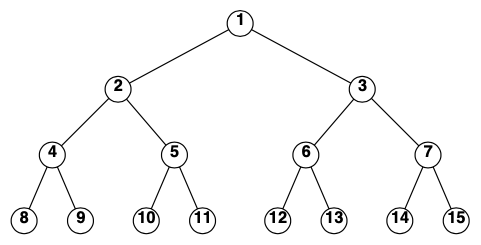

Initial stateÏù¥ 1Ïù¥Î©∞ goal stateÏùÄ 11ÏùºÎïå, 1) breadth-first search, 2)  limitÏù¥ 3 Ïù∏ depth-limited search, 3) iterative deepening searchÏùÑ Ïã§ÌñâÌñàÏùÑ Îïå Î∞©Î¨∏ÌïòÍ≤å ÎêòÎäî ÎÖ∏Îìú Î≤àÌò∏Î•º Í∞Å ÌÉêÏÉâ ÏïåÍ≥†Î¶¨Ï¶òÎßàÎã§ ÏûëÏÑ±ÌïòÏãúÏò§.

----ÏïÑÎûò ÎãµÎ≥Ä ÏûëÏÑ±----

**1) Breadth-first search**

BfsÎäî ÍπäÏù¥ ÏàúÏúºÎ°ú ÌÉêÏÉâÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶ò. Í∑∏Î†áÍ≤å ÎïåÎ¨∏Ïóê ÍπäÏù¥ 0Ïù∏ ÎÖ∏Îìú ÌÉêÏÉâ, ÍπäÏù¥ 1Ïù∏ ÎÖ∏Îìú ÌÉêÏÉâ, ÍπäÏù¥ 2Ïù∏ ÎÖ∏Îìú ÌÉêÏÉâÏùò ÏàúÏúºÎ°ú ÌÉêÏÉâÏù¥ ÏßÑÌñâÎêúÎã§. Îî∞ÎùºÏÑú ÎÖ∏Îìú ÌÉêÏÉâ ÏàúÏÑúÎäî Îã§ÏùåÍ≥º Í∞ôÎã§.

1 > 2 > 3 > 4 > 5 > 6 > 7 > 8 > 9 > 10 > 11(Goal state) ÌÉêÏÉâ Ï¢ÖÎ£å

**2) depth-limited search**

DFSÏ≤òÎüº ÏôºÏ™Ω ÎÖ∏ÎìúÎ∂ÄÌÑ∞ ÌÉêÏÉâÌïòÏßÄÎßå ÍπäÏù¥Í∞Ä 3Ïù¥ÎùºÎäî Ï†úÌïú Ï°∞Í±¥Ïù¥ ÏûàÏùå.
Îî∞ÎùºÏÑú ÌÉêÏÉâÏùÄ ÏµúÎåÄ ÍπäÏù¥ 3ÍπåÏßÄÎßå ÌÉêÏÉâÏù¥ ÏßÑÌñâÎêå.
initial stateÏùò ÏôºÏ™Ω ÎÖ∏ÎìúÎ∂ÄÌÑ∞ ÌÉêÏÉâ ÏßÑÌñâ.
1 > 2 > 4 > 8 > 9 > 5 > 10 > 11(Goal state) ÌÉêÏÉâ Ï¢ÖÎ£å

**3) iterative deepening search**

ÍπäÏù¥Î•º 0Î∂ÄÌÑ∞ ÏãúÏûëÌï¥ ÍπäÏù¥ Ï†úÌïú ÌÉêÏÉâÏùÑ ÌïòÍ≥† ÌÉêÏÉâÏù¥ ÎÅùÎÇ† Îïå ÎßàÎã§ ÍπäÏù¥Î•º 1Ïî© ÎäòÎ†§Í∞ÄÎ©∞ ÌÉêÏÉâÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶ò.

Depth = 0

1

Depth = 1

1 > 2 > 3

Depth = 2

1 > 2 > 4 > 5 > 3 > 6 > 7

Depth = 3

1 > 2 > 4 > 8 > 9 > 5 > 10 > 11(Goal state) ÌÉêÏÉâ ÏôÑÎ£å



### 3Î≤à

GridProblemÏùò `d6`, `d7` Í∑∏Î¶¨ÎìúÏóê 1) `greedy_bfs`, 2) `astar_search`, 3) `weighted_astar_search` with weight `1.4`, 4) `weighted_astar_search` with weight `2`ÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÌÉêÏÉâÏùò Í≤∞Í≥ºÎ•º Ï∂úÎ†•ÌïòÏãúÏò§. Ï∂úÎ†•Îêú Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú Í∞Å ÏïåÍ≥†Î¶¨Ï¶òÏùò optimalityÏôÄ reached stateÏùò ÌÅ¨Í∏∞Î•º ÎπÑÍµêÎ∂ÑÏÑùÌïòÏãúÏò§.

**grid problem with d6**

Greedy BFS search: 133.9 path cost
758 states reached


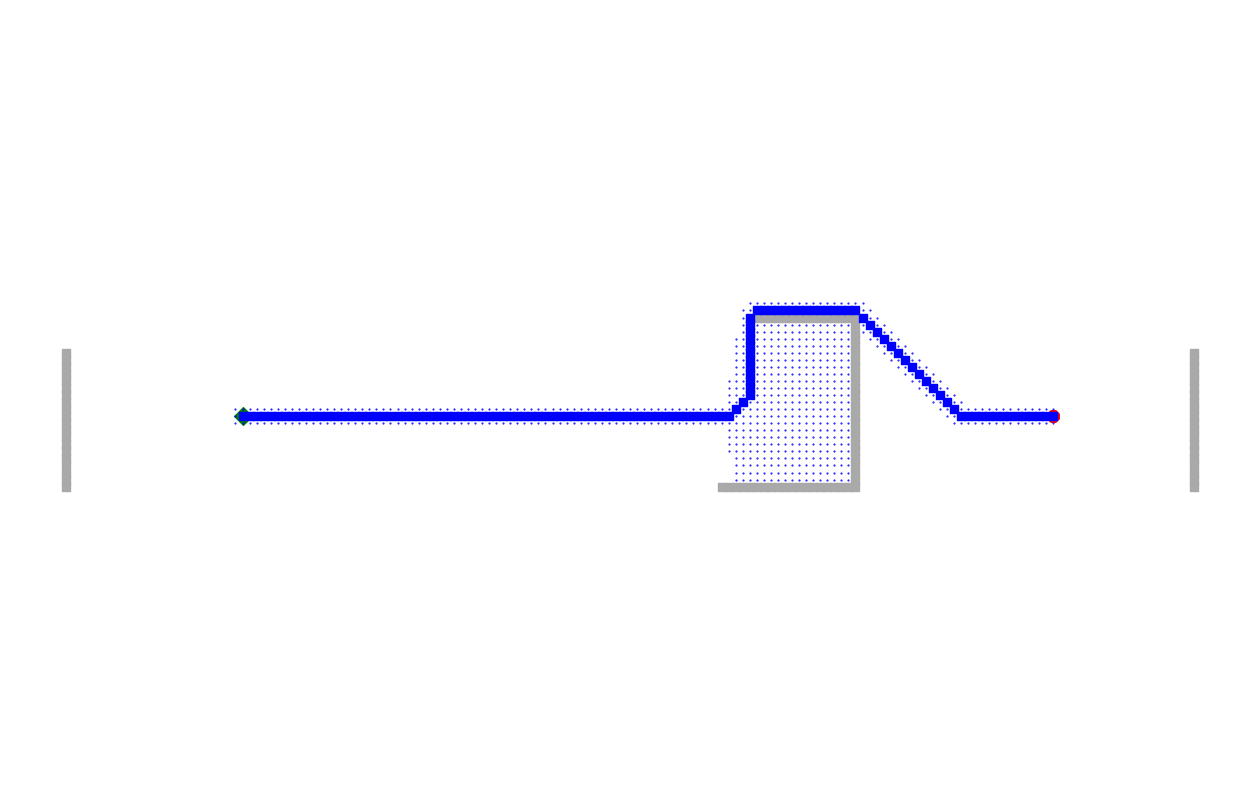

In [ ]:
# Greedy_bfs with d6
solution = greedy_bfs(d6)
plot_grid_problem(d6, solution, reached, 'Greedy BFS')

A* search search: 124.1 path cost
3,305 states reached


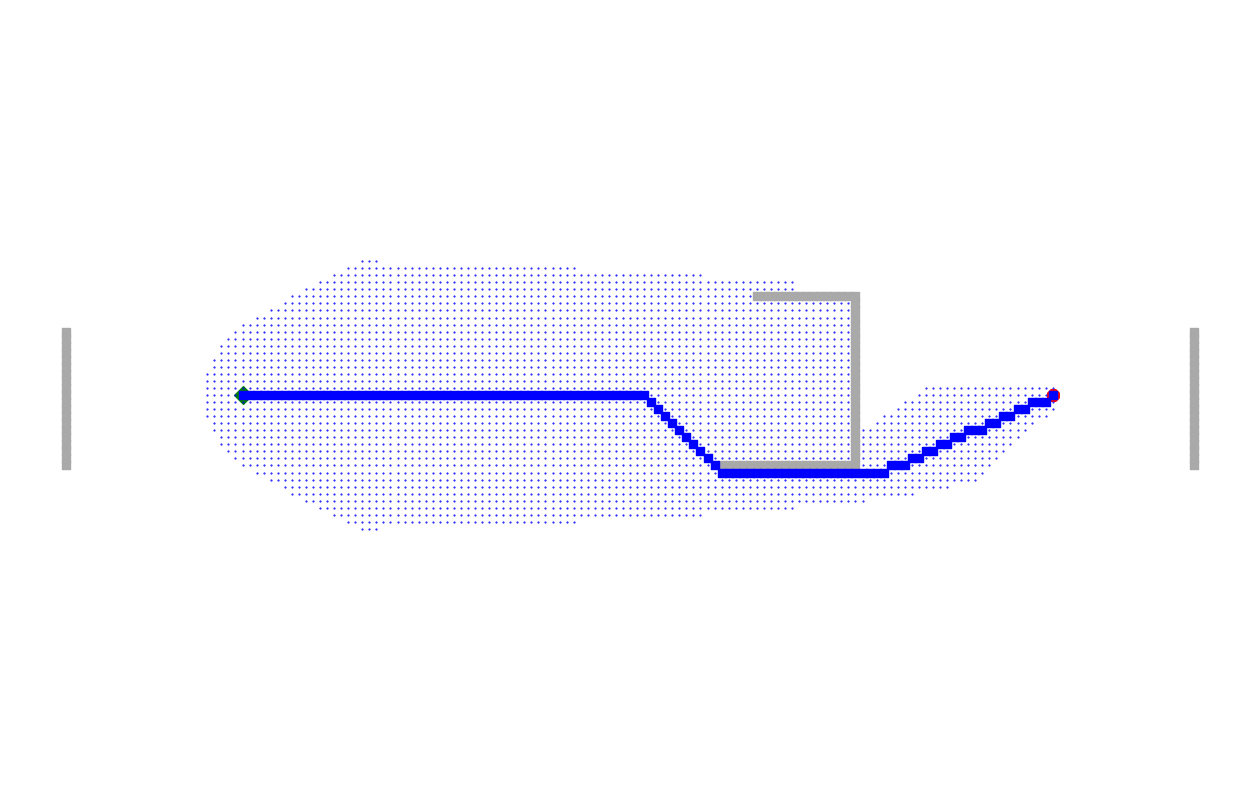

In [ ]:
# astar_search with d6
solution = astar_search(d6)
plot_grid_problem(d6, solution, reached, 'A* search')

Weighted A* search: 124.1 path cost
976 states reached


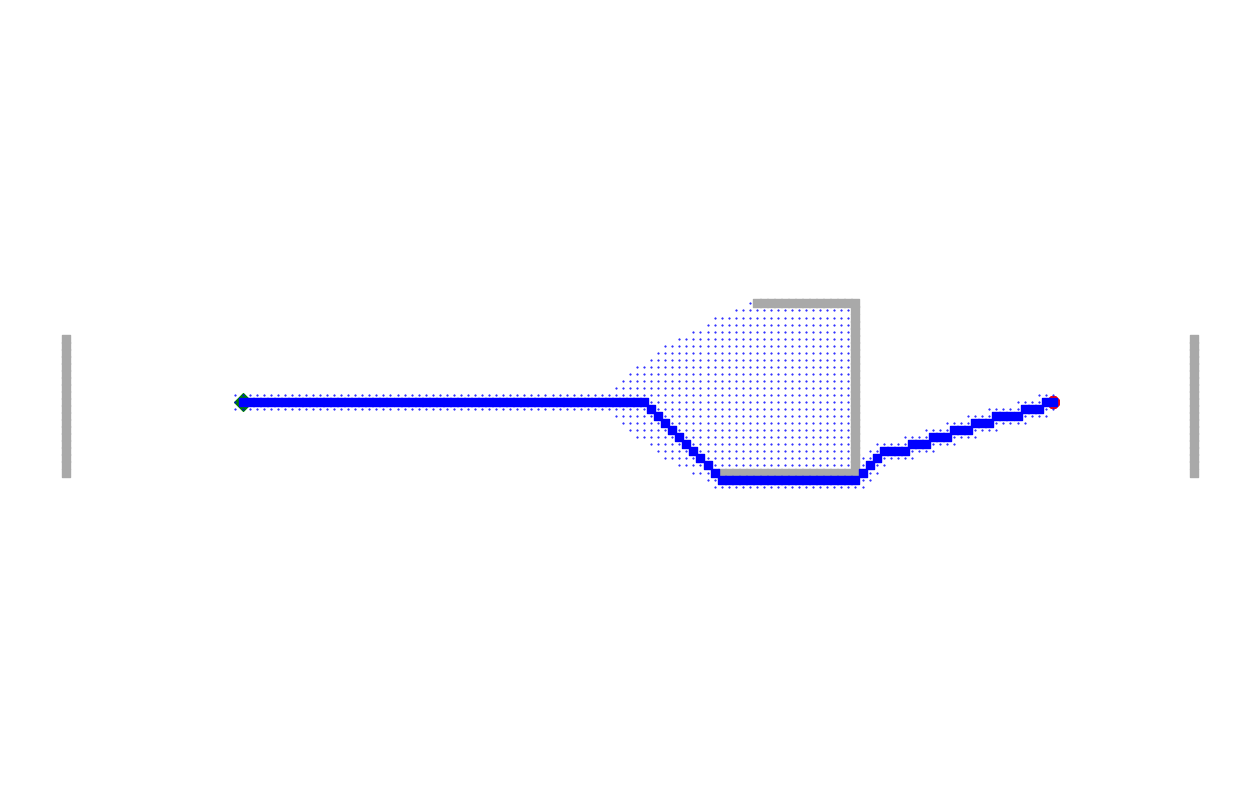

In [ ]:
# weighted_astar_search_weight 1.4 with d6
solution = weighted_astar_search(d6)
plot_grid_problem(d6, solution, reached, 'Weighted A*')

In [ ]:
# weighted_astar_search_weight 2 with d6
def weighted_astar_search(problem, h=None, weight= 2):
    """Search nodes with minimum f(n) = g(n) + weight * h(n)."""
    h = h or problem.h
    return best_first_search(problem, f=lambda n: g(n) + weight * h(n))

Weighted A* search: 128.6 path cost
879 states reached


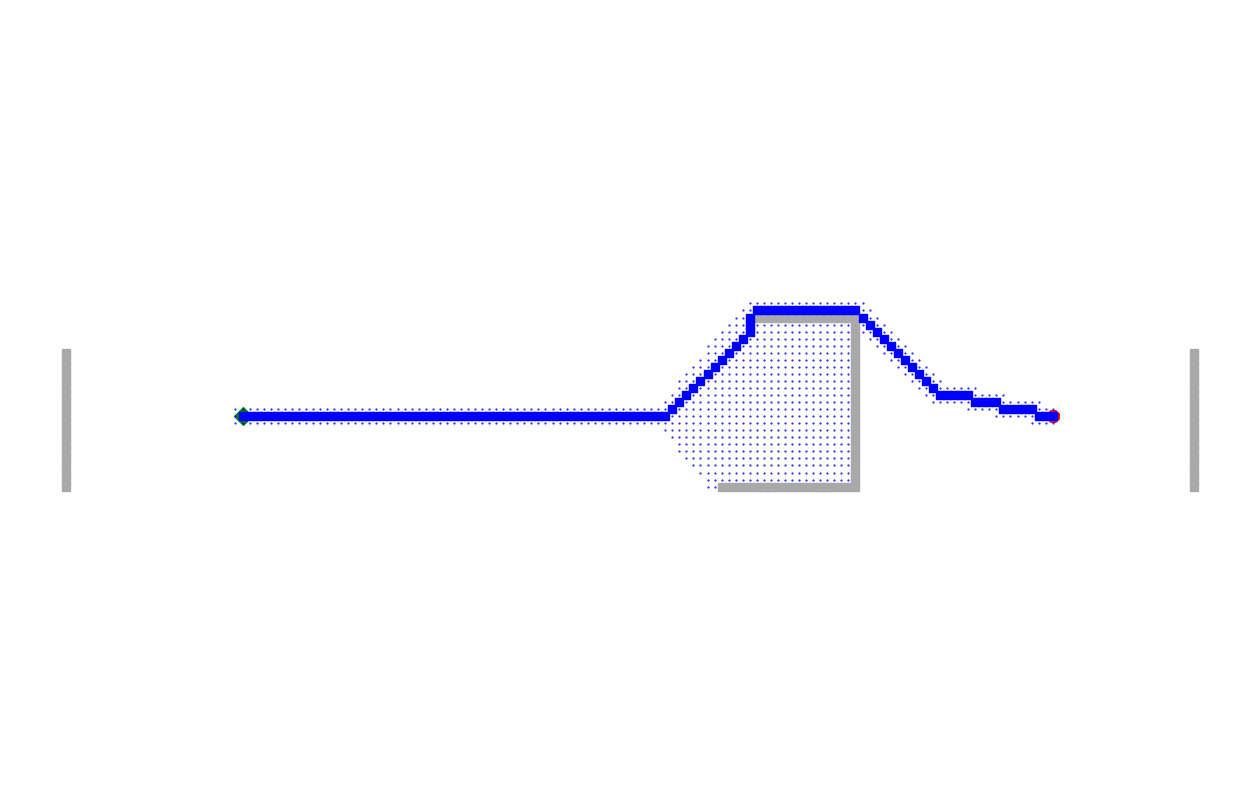

In [ ]:
# weighted_astar_search_weight 2 with d6
solution = weighted_astar_search(d6)
plot_grid_problem(d6, solution, reached, 'Weighted A*')

d6 Í≤©ÏûêÏóêÏÑú ÎÑ§ Í∞ÄÏßÄ ÌÉêÏÉâ ÏïåÍ≥†Î¶¨Ï¶ò(Greedy BFS, A* Search, Weighted A*(w=1.4), Weighted A*(w=2))ÏùÑ Ï†ÅÏö©Ìïú Í≤∞Í≥º Optimality ÏôÄ Reached State ÌÅ¨Í∏∞ Ï∏°Î©¥ÏóêÏÑú Ï∞®Ïù¥Î•º Î≥¥Ïó¨Ï§ÄÎã§.

 **Greedy BFS**Îäî Ìú¥Î¶¨Ïä§Ìã±ÎßåÏùÑ ÏÇ¨Ïö©Ìï¥ Î™©ÌëúÏôÄ Í∞ÄÍπåÏõå Î≥¥Ïù¥Îäî Í≤ΩÎ°úÎ•º Ïö∞ÏÑ† ÌôïÏû•ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Í∞ÄÏû• Ï†ÅÏùÄ ÏÉÅÌÉú(758Í∞ú)Î•º Î∞©Î¨∏ÌïòÎ©∞ ÌÉêÏÉâÏùÑ Îπ†Î•¥Í≤å ÎÅùÎÇ¥ÏßÄÎßå, Ïã§Ï†ú ÎπÑÏö©ÏùÑ Í≥†Î†§ÌïòÏßÄ ÏïäÏïÑ Í≤ΩÎ°ú ÎπÑÏö©Ïù¥ 133.9Î°ú ÎÑ§ ÏïåÍ≥†Î¶¨Ï¶ò Ï§ë Í∞ÄÏû• ÎÜíÏùÄ Í∞íÏù¥ ÎÇòÏò®Îã§.

 Î∞òÎ©¥, **A* Search** Îäî initial stateÏùò ÎàÑÏ†Å ÎπÑÏö© g(n)Í≥º Ìú¥Î¶¨Ïä§Ìã± h(n)ÏùÑ Ìï©Ìïú f(n)Î°ú ÎÖ∏ÎìúÎ•º ÌôïÏû•ÌïòÏó¨ ÏµúÏ†Å ÎπÑÏö©ÏùÑ Î≥¥Ïû•ÌïòÏßÄÎßå, Í∑∏ ÎåÄÍ∞ÄÎ°ú stateÏùÑ 3305Í∞úÎÇò Î∞©Î¨∏ÌïúÎã§. Ïù¥Îïå AÍ∞Ä Ï∞æÏùÄ Í≤ΩÎ°ú ÎπÑÏö©ÏùÄ 124.1Î°ú ÏµúÏ†ÅÏûÑÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

  **Weighted A(w=1.4)**Îäî AÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú 124.1Ïùò ÏµúÏ†Å ÎπÑÏö©ÏùÑ Ï∞æÏïòÏùåÏóêÎèÑ Ìú¥Î¶¨Ïä§Ìã±Ïóê Í∞ÄÏ§ëÏπòÎ•º ÎçîÌï¥ ÌÉêÏÉâ Î≤îÏúÑÎ•º Ï§ÑÏòÄÍ∏∞Ïóê Î∞©Î¨∏ ÏÉÅÌÉúÍ∞Ä 976Í∞úÎ°ú AÎ≥¥Îã§ Ìõ®Ïî¨ Ï†ÅÍ≥† Ìö®Ïú®Ï†ÅÏù¥Îã§. Îã®, Í∞ÄÏ§ëÏπòÍ∞Ä Îçî ÌÅ∞ **Weighted A*(w=2)**Îäî Î∞©Î¨∏ ÏÉÅÌÉú ÏàòÍ∞Ä 879Í∞úÎ°ú Ï°∞Í∏à Îçî Ï§ÑÏñ¥Îì§ÏßÄÎßå ÎπÑÏö©Ïù¥ 128.6ÏúºÎ°ú ÏÉÅÏäπÌï¥ ÏµúÏ†Å ÎπÑÏö©ÏóêÏÑú Îã§ÏÜå Î≤óÏñ¥ÎÇúÎã§.


  Ï†ïÎ¶¨ÌïòÏûêÎ©¥, Greedy BFSÎäî ÎÑ§ ÏïåÍ≥†Î¶¨Ï¶ò Ï§ë Reached stateÍ∞Ä Í∞ÄÏû• Ï†ÅÏúºÎÇò ÎπÑÏö©Ïù¥ Í∞ÄÏû• ÌÅ¨Í≥†, AÎäî ÎπÑÏö©ÏùÄ ÏµúÏÜåÏßÄÎßå Î∞©Î¨∏Ìïú StateÏù¥ ÎßéÏúºÎ©∞, Weighted AÎäî Í∞ÄÏ§ëÏπòÍ∞Ä 1.4Ïùº ÎïåÎäî ÏµúÏ†Å ÎπÑÏö©ÏùÑ Ïú†ÏßÄÌïòÎ©¥ÏÑú Î∞©Î¨∏ ÏàòÎ•º ÌÅ¨Í≤å Ï§ÑÏòÄÍ≥†, 2Î°ú Ïò¨Î¶¨Î©¥ Î∞©Î¨∏Ìïú StateÍ∞Ä Îçî Ï§ÑÏßÄÎßå ÎπÑÏö©Ïù¥ Ïò¨ÎùºÍ∞ÄÎäî Î™®ÏäµÏùÑ Î≥¥Ïù∏Îã§.
  
  Í≤∞Í≥ºÏ†ÅÏúºÎ°ú ÏµúÏ†Å ÎπÑÏö©ÏùÑ Ï†àÎåÄÏ†ÅÏúºÎ°ú Ï∂îÍµ¨ÌïúÎã§Î©¥ AÎ•º Ïì∞Îäî Í≤ÉÏù¥ ÏïàÏ†ÑÌïòÍ≥†, ÏïΩÍ∞ÑÏùò ÎπÑÏö© ÏÜêÏã§ÏùÑ Í∞êÏàòÌïòÎ©¥ÏÑú ÌÉêÏÉâ ÏÜçÎèÑÎ•º ÎÜíÏù¥Í≥† Ïã∂Îã§Î©¥ Weighted AÎ•º Ï†ÅÏö©Ìï† Ïàò ÏûàÏúºÎ©∞, Îπ†Î•¥Í≤å ÎåÄÎûµÏ†ÅÏù∏ Í≤ΩÎ°úÎßå ÌôïÎ≥¥ÌïòÍ≥†Ïûê ÌïúÎã§Î©¥ Greedy BFSÍ∞Ä Ïú†Ïö©ÌïòÎã§Îäî Í≤∞Î°†ÏùÑ ÎÇ¥Î¶¥ Ïàò ÏûàÎã§.

**Grid problem with d7**

Greedy BFS search: 151.6 path cost
830 states reached


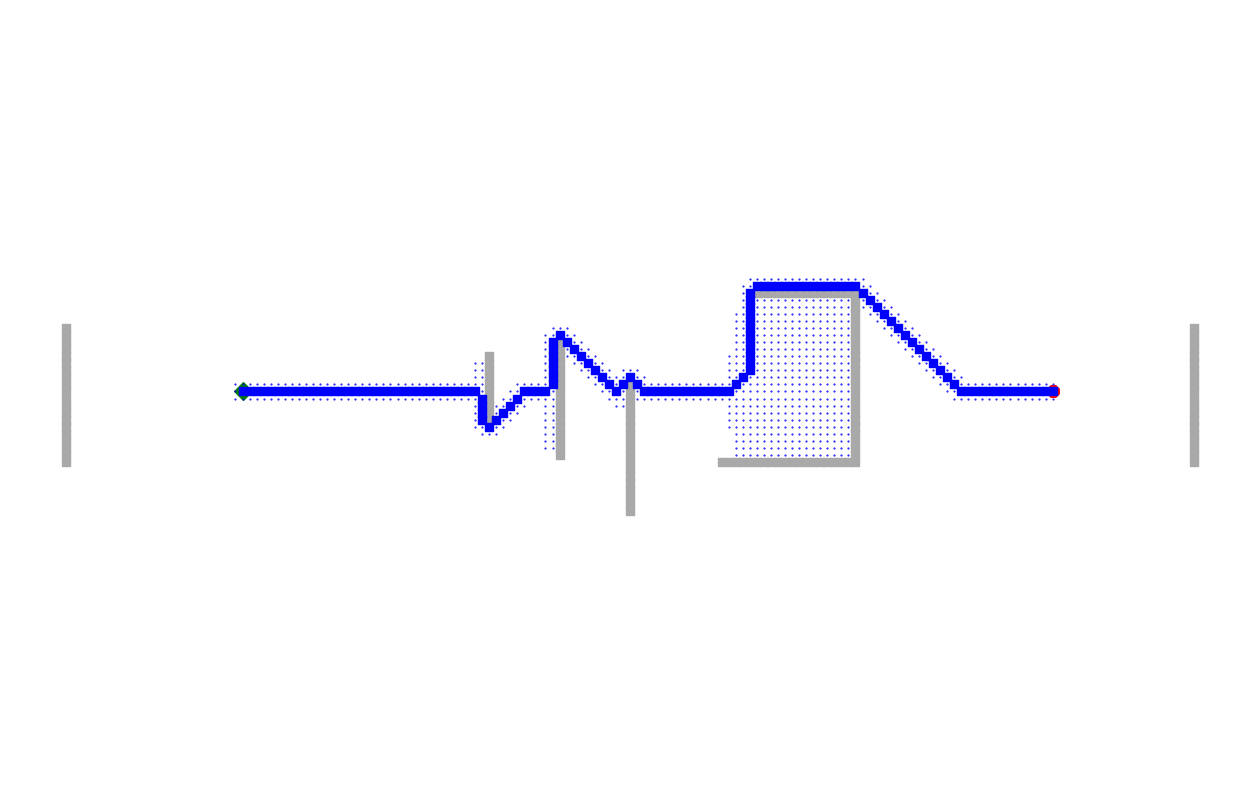

In [ ]:
# Greedy_bfs with d7
solution = greedy_bfs(d7)
plot_grid_problem(d7, solution, reached, 'Greedy BFS')

A* search search: 127.4 path cost
4,058 states reached


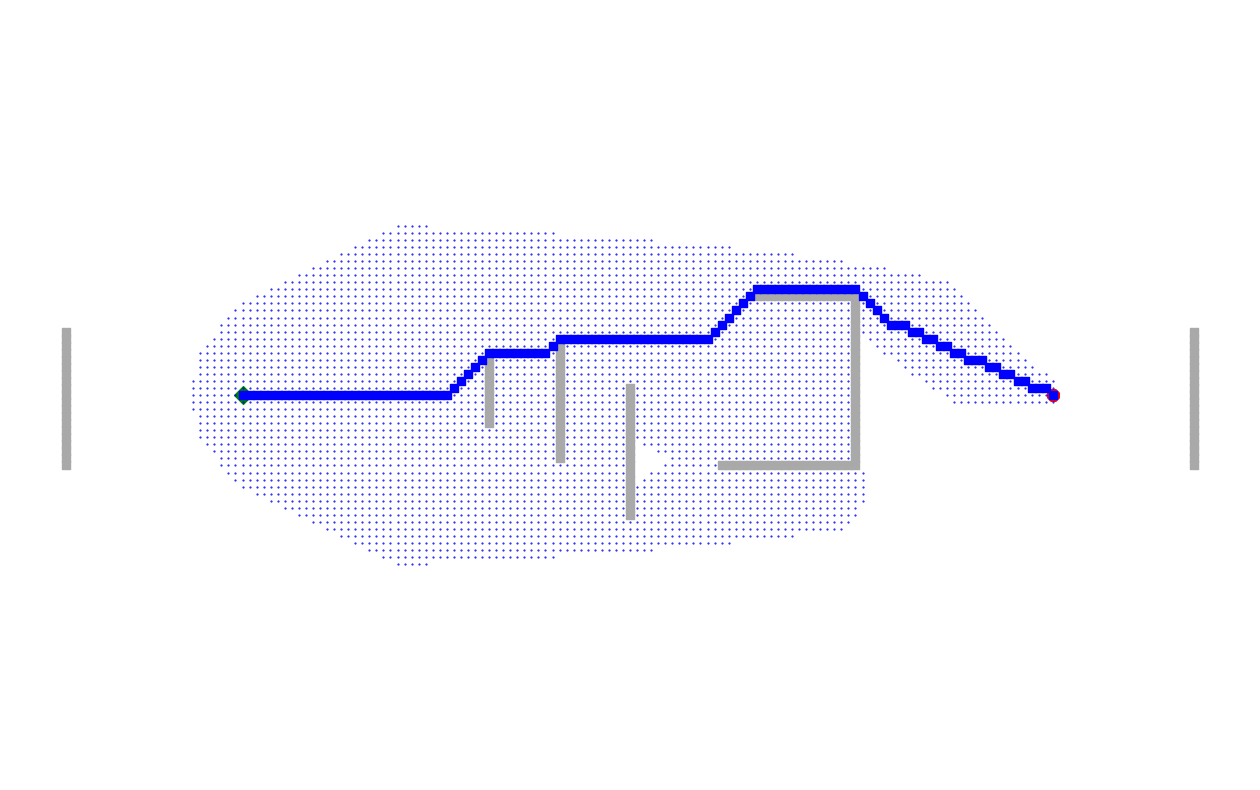

In [ ]:
# astar_search with d7
solution = astar_search(d7)
plot_grid_problem(d7, solution, reached, 'A* search')

Weighted A* search: 140.4 path cost
980 states reached


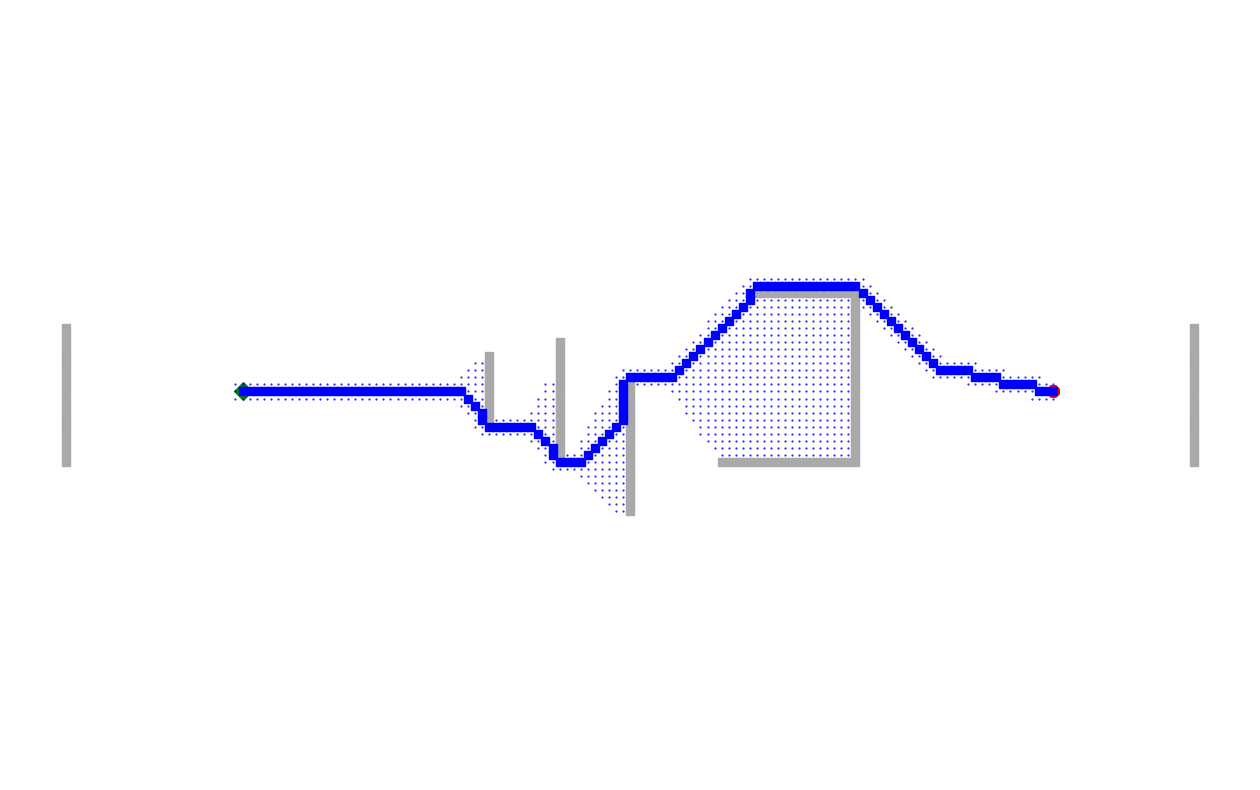

In [ ]:
# weighted_astar_search_weight 2 with d6
solution = weighted_astar_search(d7)
plot_grid_problem(d7, solution, reached, 'Weighted A*')

In [ ]:
# weighted_astar_search_weight 1.4 with d6
def weighted_astar_search(problem, h=None, weight= 1.4):
    """Search nodes with minimum f(n) = g(n) + weight * h(n)."""
    h = h or problem.h
    return best_first_search(problem, f=lambda n: g(n) + weight * h(n))

Weighted A* search: 127.4 path cost
1,290 states reached


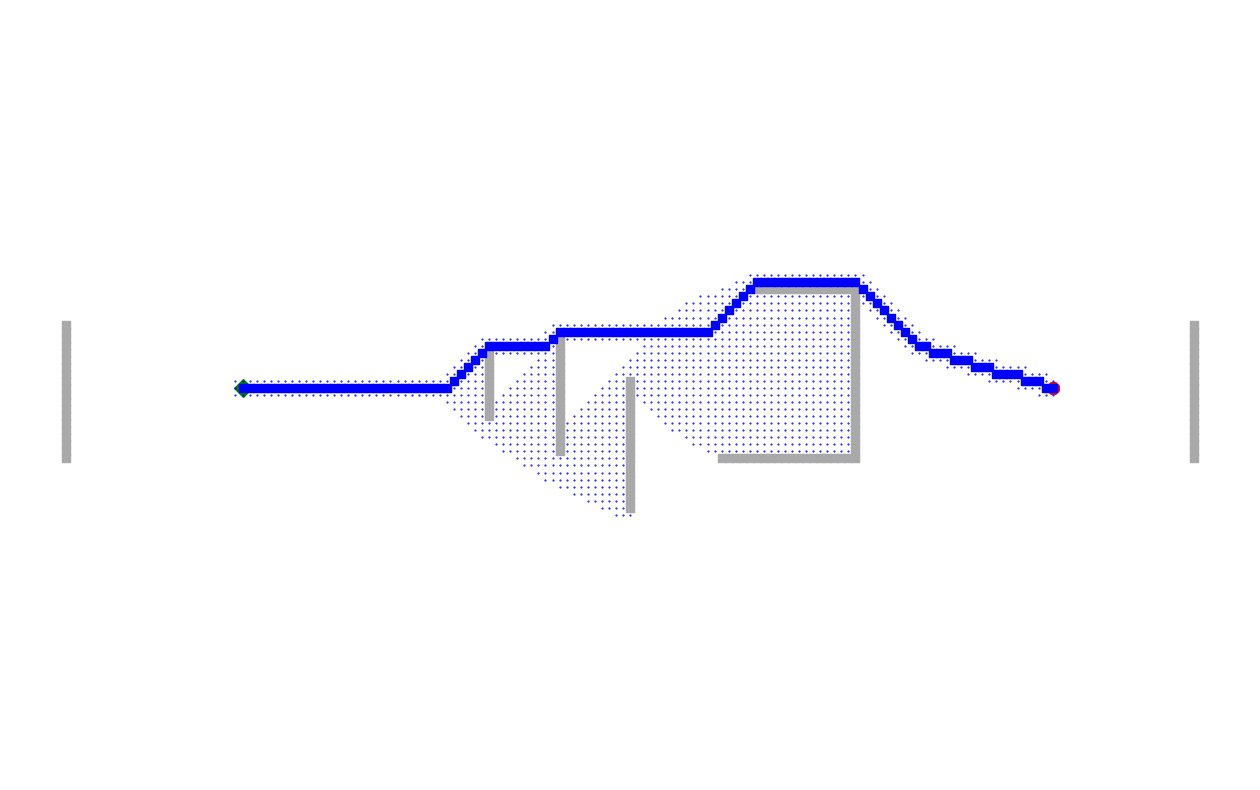

In [ ]:
# weighted_astar_search_weight 1.4 with d6
solution = weighted_astar_search(d7)
plot_grid_problem(d7, solution, reached, 'Weighted A*')

d7 Í≤©ÏûêÏóêÏÑú **Greedy BFS**Îäî Ìú¥Î¶¨Ïä§Ìã±ÏóêÎßå ÏùòÏ°¥Ìï¥ Î™©ÌëúÏóê Í∞ÄÍπåÏõå Î≥¥Ïù¥Îäî Í≤ΩÎ°úÎ•º Ïö∞ÏÑ†Ï†ÅÏúºÎ°ú Ï∞æÍ∏∞ ÎïåÎ¨∏Ïóê 830Í∞úÏùò ÏÉÅÌÉúÎßå Î∞©Î¨∏ÌïòÎ©¥ÏÑú Í∞ÄÏû• Ï†ÅÏùÄ ÌÉêÏÉâ Í∑úÎ™®Î•º Î≥¥Ïù¥ÏßÄÎßå, Í≤ΩÎ°ú ÎπÑÏö©Ïù¥ 151.6ÏúºÎ°ú ÎÑ§ ÏïåÍ≥†Î¶¨Ï¶ò Ï§ë Í∞ÄÏû• ÎπÑÏã∏Îã§.

 **A* search**Îäî ÎàÑÏ†Å ÎπÑÏö© g(n)Ïóê Ìú¥Î¶¨Ïä§Ìã± h(n)ÏùÑ Ìï©ÏÇ∞Ìï¥ ÏµúÏ†Å ÎπÑÏö©ÏùÑ Î≥¥Ïû•ÌïòÎ†§Îã§ Î≥¥Îãà Î¨¥Î†§ 4058Í∞úÏùò ÏÉÅÌÉúÎ•º Î∞©Î¨∏ÌïòÎ©∞ ÌÉêÏÉâÎüâÏù¥ Í∞ÄÏû• ÎßéÏßÄÎßå, Í≤ΩÎ°ú ÎπÑÏö©ÏùÑ 127.4Î°ú ÏñµÏ†úÌï¥ ÏµúÏ†Å Ìï¥Î•º ÌôïÎ≥¥ÌïúÎã§.

  **Weighted A(w=2)**Îäî Í∞ÄÏ§ëÏπòÍ∞Ä ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê AÎ≥¥Îã§ ÏÉÅÌÉú Î∞©Î¨∏Ïù¥ Ìõ®Ïî¨ Ï†ÅÏñ¥ 980Í∞úÏóê Í∑∏ÏπòÏßÄÎßå, Í∑∏ÎßåÌÅº Í≤ΩÎ°ú ÎπÑÏö©Ïù¥ 140.4Î°ú Ïò¨ÎùºÍ∞Ä Ïñ¥Îäê Ï†ïÎèÑ ÏµúÏ†ÅÏÑ±ÏóêÏÑú Î©ÄÏñ¥ÏßÑÎã§.
  
   Î∞òÎ©¥ **Weighted A(w=1.4)**Îäî 127.4Î°ú AÏôÄ ÎèôÏùºÌïú ÏµúÏÜå ÎπÑÏö©ÏùÑ ÎÇ¥Î©¥ÏÑúÎèÑ, Î∞©Î¨∏ ÏÉÅÌÉúÎäî 1290Í∞úÎ°ú AÎ≥¥Îã§ Ìõ®Ïî¨ Ï†ÅÏùÄ Ï†ÑÌòïÏ†ÅÏù∏ Ìú¥Î¶¨Ïä§Ìã± Í∞ÄÏ§ëÏùò Ïù¥Ï†êÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.
  
  Í≤∞Íµ≠ d6 Í∑∏Î¶¨ÎìúÏôÄÏùò ÏïåÍ≥†Î¶¨Ï¶ò Í≤∞Í≥ºÏôÄ ÎπÑÏä∑ÌïòÍ≤å ÏµúÏ†Å ÎπÑÏö©Í∞êÏÜåÎ•º Ï†àÎåÄÏ†Å Ïö∞ÏÑ†ÏàúÏúÑÎ°ú ÎëîÎã§Î©¥ AÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÍ≥†, ÏïΩÍ∞ÑÏùò ÎπÑÏö© ÏÜêÏã§ÏùÑ Í∞êÏàòÌïòÍ≥† ÌÉêÏÉâ Í∑úÎ™®Î•º Ï§ÑÏù¥Î†§Î©¥ Weighted A(w=2)Î•º, ÏµúÏ†Å ÎπÑÏö©ÏùÑ ÏñªÏúºÎ©¥ÏÑúÎèÑ AÎ≥¥Îã§ ÌÉêÏÉâÏùÑ ÌÅ¨Í≤å Ï§ÑÏù¥Î†§Î©¥ Weighted A(w=1.4)Î•º ÌôúÏö©Ìï† Ïàò ÏûàÏúºÎ©∞, Greedy BFSÎäî Í∞ÄÏû• Îπ†Î•∏ ÌÉêÏÉâÏùÑ Ï†úÍ≥µÌïòÏßÄÎßå ÎπÑÏö© Ï∏°Î©¥ÏóêÏÑú ÌÅ¨Í≤å ÏÜêÌï¥Î•º Î≥∏Îã§Îäî Ï†êÏóêÏÑú Optimality(ÏµúÏ†Å)ÌïòÏßÄ ÏïäÎã§Í≥† Ìï† Ïàò ÏûàÎã§.

### 4Î≤à

In [ ]:
class EightPuzzle(Problem):
    """ The problem of sliding tiles numbered from 1 to 8 on a 3x3 board,
    where one of the squares is a blank, trying to reach a goal configuration.
    A board state is represented as a tuple of length 9, where the element at index i
    represents the tile number at index i, or 0 if for the empty square, e.g. the goal:
        1 2 3
        4 5 6 ==> (1, 2, 3, 4, 5, 6, 7, 8, 0)
        7 8 _
    """

    def __init__(self, initial, goal=(0, 1, 2, 3, 4, 5, 6, 7, 8)):
        assert inversions(initial) % 2 == inversions(goal) % 2 # Parity check
        self.initial, self.goal = initial, goal

    def actions(self, state):
        """The indexes of the squares that the blank can move to."""
        moves = ((1, 3),    (0, 2, 4),    (1, 5),
                 (0, 4, 6), (1, 3, 5, 7), (2, 4, 8),
                 (3, 7),    (4, 6, 8),    (7, 5))
        blank = state.index(0)
        return moves[blank]

    def result(self, state, action):
        """Swap the blank with the square numbered `action`."""
        s = list(state)
        blank = state.index(0)
        s[action], s[blank] = s[blank], s[action]
        return tuple(s)

    def h1(self, node):
        """The misplaced tiles heuristic."""
        return misplaced_tiles_heuristic(node.state, self.goal)

    def h2(self, node):
        """The Manhattan heuristic."""
        return manhattan_distance_heuristic(node.state, self.goal)

    def h(self, node): return EightPuzzle.h2(self, node)


def inversions(board):
    "The number of times a piece is a smaller number than a following piece."
    return sum((a > b and a != 0 and b != 0) for (a, b) in combinations(board, 2))


def board8(board, fmt=(3 * '{} {} {}\n')):
    "A string representing an 8-puzzle board"
    return fmt.format(*board).replace('0', '_')

class Board(defaultdict):
    empty = '.'
    off = '#'
    def __init__(self, board=None, width=8, height=8, to_move=None, **kwds):
        if board is not None:
            self.update(board)
            self.width, self.height = (board.width, board.height)
        else:
            self.width, self.height = (width, height)
        self.to_move = to_move

    def __missing__(self, key):
        x, y = key
        if x < 0 or x >= self.width or y < 0 or y >= self.height:
            return self.off
        else:
            return self.empty

    def __repr__(self):
        def row(y): return ' '.join(self[x, y] for x in range(self.width))
        return '\n'.join(row(y) for y in range(self.height))

    def __hash__(self):
        return hash(tuple(sorted(self.items()))) + hash(self.to_move)

In [ ]:
e1 = EightPuzzle((1, 4, 2, 0, 7, 5, 3, 6, 8))
e2 = EightPuzzle((1, 2, 3, 4, 5, 6, 7, 8, 0))
e3 = EightPuzzle((4, 0, 2, 5, 1, 3, 7, 8, 6))
e4 = EightPuzzle((7, 2, 4, 5, 0, 6, 8, 3, 1))
e5 = EightPuzzle((8, 6, 7, 2, 5, 4, 3, 0, 1))

In [ ]:
print(board8(e1.initial))

1 4 2
_ 7 5
3 6 8



1-1) ÏÉùÏÑ±Ìòï AIÏóêÍ≤å Î¨∏Ï†úÎ•º ÏÑ§Î™ÖÌïòÍ≥†, ÏïÑÎûòÏùò `misplaced_tiles_heuristicÏôÄ` `manhattan_distance_heuristic` Ìï®ÏàòÎì§ÏùÑ Íµ¨ÌòÑÌïòÎèÑÎ°ù ÏöîÏ≤≠ÌïòÏãúÏò§. ÏÉùÏÑ±Ìòï AIÏùò Ï∂úÎ†•ÏùÑ Ï≤®Î∂ÄÌïòÏãúÏò§.

*   `misplaced_tiles_heuristic(A, B)`: ÏûòÎ™ª Î∞∞ÏπòÎêú ÌÉÄÏùºÏùò Ïàò(Í≥µÎ∞± ÎØ∏Ìè¨Ìï®)
*   `manhattan_distance_heuristic(A, B)`: ÌÉÄÏùºÏùò Î™©Ìëú ÏúÑÏπòÎ°úÎ∂ÄÌÑ∞Ïùò Í±∞Î¶¨Ïùò Ìï©. ÌÉÄÏùºÏùÄ ÎåÄÍ∞ÅÏÑ†ÏùÑ Îî∞Îùº Ïù¥ÎèôÌï† Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Í±∞Î¶¨Îäî Í∞ÄÎ°ú Î∞è ÏÑ∏Î°ú Í±∞Î¶¨Ïùò Ìï©Ïù¥Îã§.


1-2) ÏÉùÏÑ±Ìòï AIÍ∞Ä Ï∂úÎ†•Ìïú ÏΩîÎìúÏùò ÎèôÏûë ÏõêÎ¶¨Î•º "Î≥∏Ïù∏Ïùò Ïñ∏Ïñ¥"Î°ú ÏÑ§Î™ÖÌïòÍ≥†, ÏÉùÏÑ±ÌòïAIÏùò ÎèÑÏõÄÏùÑ Î∞õÏïÑ Í∞Å Ìï®ÏàòÏùò Ïó≠Ìï†Í≥º ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÑ§Î™ÖÌïòÎäî function documentationÏùÑ ÏûëÏÑ±ÌïòÏãúÏò§. ÏÉùÏÑ±Ìòï AIÍ∞Ä Ï∂úÎ†•Ìïú function documentationÏùò ÏöîÏÜåÎäî Î¨¥ÏóáÏù¥Î©∞ Ïñ¥Îñ§ ÌäπÏßïÏùÑ ÎùÑÎäîÍ∞Ä?

1-3) ÏÉùÏÑ±Ìòï AIÏùò ÎèÑÏõÄÏùÑ Î∞õÏïÑ ÏûÖÎ†•Í∞íÏùò Î≤îÏúÑÎ•º Ï∂©Î∂ÑÌûà coverÌïòÎäî Îã§ÏñëÌïú ÌÖåÏä§Ìä∏ ÏºÄÏù¥Ïä§Î•º ÏÑ§Í≥ÑÌïòÍ≥† Ïã§ÌñâÌïòÏó¨ Ìï®ÏàòÍ∞Ä Ïò¨Î∞îÎ•¥Í≤å ÎèôÏûëÌïòÎäîÏßÄ Í≤ÄÏ¶ùÌïòÏãúÏò§.

1-4) ÏÉùÏÑ±Ìòï AIÏùÑ ÏÇ¨Ïö©Ìï¥ ÏΩîÎìúÏùò ÏÑ±Îä•ÏùÑ ÏµúÏ†ÅÌôîÌïòÍ±∞ÎÇò Í∞ÄÎèÖÏÑ±ÏùÑ ÎÜíÏùº Ïàò ÏûàÎäî Î∞©Î≤ïÏùÑ Ï∞æÏïÑÎ≥¥Í≥†, Í∞úÏÑ†Îêú Î≤ÑÏ†ÑÏù¥ Ï°¥Ïû¨ÌïúÎã§Î©¥ Ïù¥Î•º Íµ¨ÌòÑÌï¥Î≥¥ÏãúÏò§.

1-5) Ï¥àÍ∏∞ ÏΩîÎìúÏôÄ Í∞úÏÑ†Îêú ÏΩîÎìúÏùò Ï∞®Ïù¥Ï†êÏùÑ ÏÑ§Î™ÖÌïòÍ≥†, Ïñ¥Îñ§ Ï†êÏóêÏÑú ÏΩîÎìúÍ∞Ä Ìñ•ÏÉÅÎêòÏóàÎäîÏßÄ ÏûëÏÑ±ÌïòÏãúÏò§.




In [ ]:
# 1-1)
def misplaced_tiles_heuristic(A, B):
  # Îëê ÌçºÏ¶ê ÏÉÅÌÉú Í∞Ñ ÏûòÎ™ª Î∞∞ÏπòÎêú ÌÉÄÏùºÏùò Í∞úÏàò Í≥ÑÏÇ∞
  # ÌòÑÏû¨ ÌçºÏ¶ê ÏÉÅÌÉú AÏôÄ Î™©Ìëú ÌçºÏ¶ê ÏÉÅÌÉú BÎ•º ÎπÑÍµêÌï¥ Í∞Å ÏúÑÏπòÏóêÏÑú ÌÉÄÏùºÏùò Î≤àÌò∏Í∞Ä Îã§Î•º Í≤ΩÏö∞ ÏûòÎ™ª Î∞∞ÏπòÎêú ÌÉÄÏùºÏùò Ïàò ÎàÑÏ†Å Î∞òÌôò
  # A = ÌòÑÏû¨ ÌçºÏ¶ê ÏÉÅÌÉú
  # B = Î™©Ìëú ÌçºÏ¶ê ÏÉÅÌÉú
  # int = ÏûòÎ™ª Î∞∞ÏπòÎêú ÌÉÄÏùºÏùò Í∞úÏàò
    return sum(1 for i in range(len(A)) if A[i] != 0 and A[i] != B[i])

def manhattan_distance_heuristic(A, B):
  # ÌòÑÏû¨ ÌçºÏ¶ê ÏÉÅÌÉú AÏùò Í∞Å ÌÉÄÏùºÏóê ÎåÄÌï¥ Ìï¥Îãπ ÌÉÄÏùºÏù¥ Î™©Ìëú ÏÉÅÌÉú BÏóêÏÑú ÏûàÏñ¥Ïïº Ìï† ÏúÑÏπòÍπåÏßÄÏùò Í±∞Î¶¨ Í≥ÑÏÇ∞ ÌõÑ Î∞òÌôò
  # Îß§Í∞ú Î≥ÄÏàò ÎèôÏùº
  # int = Î™®Îì† ÌÉÄÏùºÏùò Îß®Ìï¥Ìäº Í±∞Î¶¨Ïùò Ìï©
    distance = 0
    for i in range(len(A)):
        if A[i] != 0:
            goal_index = B.index(A[i])
            distance += abs((i // 3) - (goal_index // 3)) + abs((i % 3) - (goal_index % 3))
    return distance


1-2 )

ÎèôÏûë ÏõêÎ¶¨

Ïù¥ ÏΩîÎìúÎäî ÏïûÏÑú ÏúÑÏùò ÏΩîÎìúÏóêÏÑú Ï†ïÏùòÎêú 8-puzzle Î¨∏Ï†úÏóêÏÑú Ìú¥Î¶¨Ïä§Ìã± ÌèâÍ∞ÄÎ•º ÏúÑÌï¥ ÏÇ¨Ïö©ÎêòÎäî Ìï®ÏàòÎ°úÏç® **misplaced_tiles_heuristic**Îäî ÌòÑÏû¨ ÏÉÅÌÉúÏôÄ Î™©Ìëú ÏÉÅÌÉúÏóêÏÑú ÏúÑÏπòÍ∞Ä Îã§Î•∏ ÌÉÄÏùºÏùò Í∞úÏàòÎ•º ÏÑ∏Ïñ¥ Î∞òÌôòÌïòÎêò ÎπàÏπ∏Ïù∏ 0ÏùÄ Ï†úÏô∏ÌïúÎã§.
**manhattan_distance_heuristic** Í∞Å ÌÉÄÏùºÏù¥ Î™©Ìëú ÏúÑÏπòÍπåÏßÄ ÏàòÌèâ/ÏàòÏßÅÏúºÎ°ú Ïù¥ÎèôÌï¥Ïïº ÌïòÎäî Ïπ∏ ÏàòÏùò Ìï©ÏùÑ Í≥ÑÏÇ∞(ÌñâÍ≥º Ïó¥ÏùÑ Í∞ÅÍ∞Å Í≥ÑÏÇ∞ÌïòÏó¨ Ï∞®Ïù¥ Í∞íÏùÑ ÎçîÌïòÎäî Ïãù)Ìï¥ÏÑú Î∞òÌôòÌïúÎã§. Ïó≠Ïãú ÎπàÏπ∏ÏùÄ Ï†úÏô∏ÌïòÍ≥† ÎåÄÍ∞ÅÏÑ†ÏùÄ Í≥†Î†§ÌïòÏßÄ ÏïäÎäîÎã§.

ÏÉùÏÑ±Ìòï AIÎäî ÏΩîÎìú ÎèôÏûë, Îß§Í∞úÎ≥ÄÏàò,Î∞òÌôòÍ∞íÏóê ÎåÄÌïú documentationÏùÑ ÏÉùÏÑ±ÌïòÏó¨ ÏΩîÎìúÏùò Í∞ÄÎèÖÏÑ±ÏùÑ ÎÜíÏù¥Í≥† Ìï®ÏàòÏùò ÏÇ¨Ïö©Î≤ïÏùÑ Î™ÖÌôïÌïòÍ≤å ÌïòÎäî ÌäπÏßïÏùÑ ÎùàÎã§.





In [ ]:
# 1-3)
def run_tests():
    goal = (1, 2, 3, 4, 5, 6, 7, 8, 0)

    tests = [
        {
            "desc": "Ï†ïÏÉÅ ÏÉÅÌÉú (ÏôÑÎ≤ΩÌûà Ï†ïÎ†¨Îêú ÏÉÅÌÉú)",
            "state": (1, 2, 3, 4, 5, 6, 7, 8, 0),
            "expected_misplaced": 0,
            "expected_manhattan": 0
        },
        {
            "desc": "Îß® ÎÅù Îëê ÌÉÄÏùºÏùò ÏúÑÏπò ÍµêÌôò (ÎπàÏπ∏ Ï†úÏô∏)",
            "state": (1, 2, 3, 4, 5, 6, 0, 7, 8),
            "expected_misplaced": 2,
            "expected_manhattan": 2
        },
        {
            "desc": "Ï§ëÍ∞ÑÏóê ÎπàÏπ∏ Î∞∞Ïπò, Îëê ÌÉÄÏùº ÏûòÎ™ª Î∞∞Ïπò",
            "state": (1, 2, 3, 4, 0, 6, 7, 5, 8),
            "expected_misplaced": 2,
            "expected_manhattan": 2
        },
        {
            "desc": "ÎπàÏπ∏Îßå ÏúÑÏπò Î≥ÄÍ≤Ω",
            "state": (1, 2, 3, 4, 5, 6, 7, 0, 8),
            "expected_misplaced": 1,
            "expected_manhattan": 1
        },
        {
            "desc": "Ïó≠Ïàú Î∞∞Ïó¥ (ÏµúÏïÖÏùò Í≤ΩÏö∞)",
            "state": (0, 8, 7, 6, 5, 4, 3, 2, 1),
            "expected_misplaced": 7,   # 0ÏùÄ Ï†úÏô∏ÌïòÎØÄÎ°ú ÎÇòÎ®∏ÏßÄ 7Í∞úÍ∞Ä ÏûòÎ™ªÎê®.
            "expected_manhattan": 20   # Í∞Å ÌÉÄÏùºÎ≥Ñ Îß®Ìï¥Ìäº Í±∞Î¶¨ Ìï©ÏÇ∞ Í≤∞Í≥º.
        }
    ]

    for test in tests:
        state = test["state"]
        desc = test["desc"]
        expected_misplaced = test["expected_misplaced"]
        expected_manhattan = test["expected_manhattan"]

        result_misplaced = misplaced_tiles_heuristic(state, goal)
        result_manhattan = manhattan_distance_heuristic(state, goal)

        print(f"ÌÖåÏä§Ìä∏: {desc}")
        print(f"ÏÉÅÌÉú: {state}")
        print(f"misplaced_tiles_heuristic: {result_misplaced} (ÏòàÏÉÅ: {expected_misplaced})")
        print(f"manhattan_distance_heuristic: {result_manhattan} (ÏòàÏÉÅ: {expected_manhattan})")
        print("-" * 50)


if __name__ == "__main__":
    run_tests()

ÌÖåÏä§Ìä∏: Ï†ïÏÉÅ ÏÉÅÌÉú (ÏôÑÎ≤ΩÌûà Ï†ïÎ†¨Îêú ÏÉÅÌÉú)
ÏÉÅÌÉú: (1, 2, 3, 4, 5, 6, 7, 8, 0)
misplaced_tiles_heuristic: 0 (ÏòàÏÉÅ: 0)
manhattan_distance_heuristic: 0 (ÏòàÏÉÅ: 0)
--------------------------------------------------
ÌÖåÏä§Ìä∏: Îß® ÎÅù Îëê ÌÉÄÏùºÏùò ÏúÑÏπò ÍµêÌôò (ÎπàÏπ∏ Ï†úÏô∏)
ÏÉÅÌÉú: (1, 2, 3, 4, 5, 6, 0, 7, 8)
misplaced_tiles_heuristic: 2 (ÏòàÏÉÅ: 2)
manhattan_distance_heuristic: 2 (ÏòàÏÉÅ: 2)
--------------------------------------------------
ÌÖåÏä§Ìä∏: Ï§ëÍ∞ÑÏóê ÎπàÏπ∏ Î∞∞Ïπò, Îëê ÌÉÄÏùº ÏûòÎ™ª Î∞∞Ïπò
ÏÉÅÌÉú: (1, 2, 3, 4, 0, 6, 7, 5, 8)
misplaced_tiles_heuristic: 2 (ÏòàÏÉÅ: 2)
manhattan_distance_heuristic: 2 (ÏòàÏÉÅ: 2)
--------------------------------------------------
ÌÖåÏä§Ìä∏: ÎπàÏπ∏Îßå ÏúÑÏπò Î≥ÄÍ≤Ω
ÏÉÅÌÉú: (1, 2, 3, 4, 5, 6, 7, 0, 8)
misplaced_tiles_heuristic: 1 (ÏòàÏÉÅ: 1)
manhattan_distance_heuristic: 1 (ÏòàÏÉÅ: 1)
--------------------------------------------------
ÌÖåÏä§Ìä∏: Ïó≠Ïàú Î∞∞Ïó¥ (ÏµúÏïÖÏùò Í≤ΩÏö∞)
ÏÉÅÌÉú: (0, 8, 7, 6, 5, 4, 3, 2, 1)
misplaced_tiles_heu

In [ ]:
import concurrent.futures

def misplaced_tiles_heuristic(A, B):
    """
    Îëê ÌçºÏ¶ê ÏÉÅÌÉú Í∞Ñ ÏûòÎ™ª Î∞∞ÏπòÎêú ÌÉÄÏùºÏùò Í∞úÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    (ÎπàÏπ∏Ïù∏ 0ÏùÄ ÎπÑÍµêÏóêÏÑú Ï†úÏô∏Îê©ÎãàÎã§.)
    """
    return sum(1 for i in range(len(A)) if A[i] != 0 and A[i] != B[i])


def manhattan_distance_heuristic(A, B):
    """
    Îëê ÌçºÏ¶ê ÏÉÅÌÉú Í∞Ñ Í∞Å ÌÉÄÏùºÏùò Îß®Ìï¥Ìäº Í±∞Î¶¨Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    (ÎπàÏπ∏Ïù∏ 0ÏùÄ Í≥ÑÏÇ∞ ÎåÄÏÉÅÏóêÏÑú Ï†úÏô∏Îê©ÎãàÎã§.)

    ÏÑ±Îä• ÏµúÏ†ÅÌôîÎ•º ÏúÑÌï¥, Î™©Ìëú ÏÉÅÌÉú BÏùò Í∞Å ÌÉÄÏùº ÏúÑÏπòÎ•º ÎØ∏Î¶¨ ÎîïÏÖîÎÑàÎ¶¨Î°ú Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    goal_positions = {tile: (idx // 3, idx % 3) for idx, tile in enumerate(B) if tile != 0}
    distance = 0
    for idx, tile in enumerate(A):
        if tile != 0:
            current_row, current_col = idx // 3, idx % 3
            goal_row, goal_col = goal_positions[tile]
            distance += abs(current_row - goal_row) + abs(current_col - goal_col)
    return distance


def run_test_case(test, goal_state):
    """
    Îã®Ïùº ÌÖåÏä§Ìä∏ ÏºÄÏù¥Ïä§Î•º Ïã§ÌñâÌïòÏó¨ Í≤∞Í≥ºÎ•º Î∞òÌôòÌï©ÎãàÎã§.
    """
    state = test["state"]
    desc = test["desc"]
    expected_misplaced = test["expected_misplaced"]
    expected_manhattan = test["expected_manhattan"]

    result_misplaced = misplaced_tiles_heuristic(state, goal_state)
    result_manhattan = manhattan_distance_heuristic(state, goal_state)

    success = (result_misplaced == expected_misplaced) and (result_manhattan == expected_manhattan)
    return (desc, state, result_misplaced, expected_misplaced, result_manhattan, expected_manhattan, success)


def run_tests():
    """
    Îã§ÏñëÌïú ÌÖåÏä§Ìä∏ ÏºÄÏù¥Ïä§Î•º ÎèôÏãú Ïã§ÌñâÌïòÏó¨ Ìú¥Î¶¨Ïä§Ìã± Ìï®ÏàòÎì§Ïùò Ïò¨Î∞îÎ•∏ ÎèôÏûëÍ≥º
    Ïã§Ìñâ ÏãúÍ∞Ñ ÏµúÏ†ÅÌôîÎ•º Í≤ÄÏ¶ùÌï©ÎãàÎã§.
    """
    goal_state = (1, 2, 3, 4, 5, 6, 7, 8, 0)

    tests = [
        {
            "desc": "Ï†ïÏÉÅ ÏÉÅÌÉú (ÏôÑÎ≤ΩÌûà Ï†ïÎ†¨Îêú ÏÉÅÌÉú)",
            "state": (1, 2, 3, 4, 5, 6, 7, 8, 0),
            "expected_misplaced": 0,
            "expected_manhattan": 0
        },
        {
            "desc": "Îß® ÎÅù Îëê ÌÉÄÏùºÏùò ÏúÑÏπò ÍµêÌôò (ÎπàÏπ∏ Ï†úÏô∏)",
            "state": (1, 2, 3, 4, 5, 6, 0, 7, 8),
            "expected_misplaced": 2,
            "expected_manhattan": 2
        },
        {
            "desc": "Ï§ëÍ∞ÑÏóê ÎπàÏπ∏ Î∞∞Ïπò, Îëê ÌÉÄÏùº ÏûòÎ™ª Î∞∞Ïπò",
            "state": (1, 2, 3, 4, 0, 6, 7, 5, 8),
            "expected_misplaced": 2,
            "expected_manhattan": 2
        },
        {
            "desc": "ÎπàÏπ∏Îßå ÏúÑÏπò Î≥ÄÍ≤Ω",
            "state": (1, 2, 3, 4, 5, 6, 7, 0, 8),
            "expected_misplaced": 1,
            "expected_manhattan": 1
        },
        {
            "desc": "Ïó≠Ïàú Î∞∞Ïó¥ (ÏµúÏïÖÏùò Í≤ΩÏö∞)",
            "state": (0, 8, 7, 6, 5, 4, 3, 2, 1),
            "expected_misplaced": 7,   # ÎπàÏπ∏(0)ÏùÄ Ï†úÏô∏ÌïòÎØÄÎ°ú, ÎÇòÎ®∏ÏßÄ 7Í∞ú ÌÉÄÏùºÏù¥ ÏûòÎ™ª Î∞∞ÏπòÎê®.
            "expected_manhattan": 20   # Í∞Å ÌÉÄÏùºÏùò Îß®Ìï¥Ìäº Í±∞Î¶¨ Ìï©ÏÇ∞ Í≤∞Í≥º.
        }
    ]

    all_passed = True
    results = []

    # ThreadPoolExecutorÎ•º ÏÇ¨Ïö©Ìï¥ Í∞Å ÌÖåÏä§Ìä∏ ÏºÄÏù¥Ïä§Î•º Î≥ëÎ†¨ Ïã§ÌñâÌï©ÎãàÎã§.
    with concurrent.futures.ThreadPoolExecutor() as executor:
        future_to_test = {executor.submit(run_test_case, test, goal_state): test for test in tests}
        for future in concurrent.futures.as_completed(future_to_test):
            results.append(future.result())

    # Í≤∞Í≥º Ï∂úÎ†•
    print("=" * 60)
    for idx, res in enumerate(results, start=1):
        desc, state, result_misplaced, expected_misplaced, result_manhattan, expected_manhattan, success = res
        print(f"ÌÖåÏä§Ìä∏ #{idx}: {desc}")
        print(f"  ÏÉÅÌÉú: {state}")
        print(f"  misplaced_tiles_heuristic: {result_misplaced} (ÏòàÏÉÅ: {expected_misplaced})")
        print(f"  manhattan_distance_heuristic: {result_manhattan} (ÏòàÏÉÅ: {expected_manhattan})")
        print("  Í≤∞Í≥º:", "ÏÑ±Í≥µ" if success else "Ïã§Ìå®")
        print("-" * 60)
        if not success:
            all_passed = False

    if all_passed:
        print("Î™®Îì† ÌÖåÏä§Ìä∏ ÏºÄÏù¥Ïä§Î•º ÌÜµÍ≥ºÌñàÏäµÎãàÎã§.")
    else:
        print("ÏùºÎ∂Ä ÌÖåÏä§Ìä∏ ÏºÄÏù¥Ïä§Í∞Ä Ïã§Ìå®ÌñàÏäµÎãàÎã§.")


if __name__ == "__main__":
    run_tests()


ÌÖåÏä§Ìä∏ #1: Ï†ïÏÉÅ ÏÉÅÌÉú (ÏôÑÎ≤ΩÌûà Ï†ïÎ†¨Îêú ÏÉÅÌÉú)
  ÏÉÅÌÉú: (1, 2, 3, 4, 5, 6, 7, 8, 0)
  misplaced_tiles_heuristic: 0 (ÏòàÏÉÅ: 0)
  manhattan_distance_heuristic: 0 (ÏòàÏÉÅ: 0)
  Í≤∞Í≥º: ÏÑ±Í≥µ
------------------------------------------------------------
ÌÖåÏä§Ìä∏ #2: Îß® ÎÅù Îëê ÌÉÄÏùºÏùò ÏúÑÏπò ÍµêÌôò (ÎπàÏπ∏ Ï†úÏô∏)
  ÏÉÅÌÉú: (1, 2, 3, 4, 5, 6, 0, 7, 8)
  misplaced_tiles_heuristic: 2 (ÏòàÏÉÅ: 2)
  manhattan_distance_heuristic: 2 (ÏòàÏÉÅ: 2)
  Í≤∞Í≥º: ÏÑ±Í≥µ
------------------------------------------------------------
ÌÖåÏä§Ìä∏ #3: Ï§ëÍ∞ÑÏóê ÎπàÏπ∏ Î∞∞Ïπò, Îëê ÌÉÄÏùº ÏûòÎ™ª Î∞∞Ïπò
  ÏÉÅÌÉú: (1, 2, 3, 4, 0, 6, 7, 5, 8)
  misplaced_tiles_heuristic: 2 (ÏòàÏÉÅ: 2)
  manhattan_distance_heuristic: 2 (ÏòàÏÉÅ: 2)
  Í≤∞Í≥º: ÏÑ±Í≥µ
------------------------------------------------------------
ÌÖåÏä§Ìä∏ #4: ÎπàÏπ∏Îßå ÏúÑÏπò Î≥ÄÍ≤Ω
  ÏÉÅÌÉú: (1, 2, 3, 4, 5, 6, 7, 0, 8)
  misplaced_tiles_heuristic: 1 (ÏòàÏÉÅ: 1)
  manhattan_distance_heuristic: 1 (ÏòàÏÉÅ: 1)
  Í≤∞Í≥º: ÏÑ±Í≥µ
----------------

# 1-5 )
Ï¥àÍ∏∞ ÏΩîÎìúÏôÄ Í∞úÏÑ† ÏΩîÎìúÏùò Ï∞®Ïù¥Ï†êÏùÄ ÌÅ¨Í≤å ÎëêÍ∞ÄÏßÄÎ°ú Î≥º Ïàò ÏûàÎã§.
# Í∞ÄÎèÖÏÑ± Ìñ•ÏÉÅ
Ï∂úÎ†• Î©îÏãúÏßÄÎ•º ÏùºÍ¥ÄÏÑ± ÏûàÍ≤å Ïû¨Íµ¨ÏÑ±ÌïòÏó¨ ÌÖåÏä§Ìä∏ Í≤∞Í≥ºÎ•º ÌïúÎààÏóê ÌååÏïÖÌï† Ïàò ÏûàÎèÑÎ°ù Ï∂úÎ†• Î©îÏãúÏßÄÏùò ÌòïÏãùÏùÑ Í∞úÏÑ†ÌïòÏòÄÍ≥† Í∞Å Ìï®ÏàòÏóê ÎåÄÌï¥ DocumentaitonÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ Í∞ÄÎèÖÏÑ±ÏùÑ Ïò¨Î†∏Îã§.

# Ïã§Ìñâ ÏãúÍ∞Ñ ÏµúÏ†ÅÌôî
manhattan_distance_heuristic Ìï®Ïàò ÎÇ¥Î∂ÄÏóêÏÑú B.index()Î•º Î∞òÎ≥µ Ìò∏Ï∂úÌïòÎäî ÎåÄÏã†, Î™©Ìëú ÏÉÅÌÉúÏóêÏÑú Í∞Å ÌÉÄÏùºÏùò ÌñâÍ≥º Ïó¥ Ï†ïÎ≥¥Î•º ÎîïÏÖîÎÑàÎ¶¨(goal_positions)Ïóê ÎØ∏Î¶¨ Ï†ÄÏû•ÌïòÏó¨, Í∞Å ÌÉÄÏùºÏùò Î™©Ìëú ÏúÑÏπòÎ•º Îπ†Î•¥Í≤å Ï°∞ÌöåÌï† Ïàò ÏûàÎèÑÎ°ù ÌñàÏäµÎãàÎã§.
Îòê Ïù¥Ï†ÑÏóêÎäî Í∞Å ÌÖåÏä§Ìä∏ ÏºÄÏù¥Ïä§Î•º Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú Ï≤òÎ¶¨ÌñàÎã§Î©¥ ÏàòÏ†ïÎêú ÏΩîÎìúÏóêÏÑúÎäî ÌÖåÏä§Î•º ÎèôÏãúÏóê Ïã§ÌñâÌï®ÏúºÎ°úÏç® Ï†ÑÏ≤¥ ÌÖåÏä§Ìä∏ Ïã§Ìñâ ÏãúÍ∞ÑÏùÑ Ï§ÑÏòÄÏäµÎãàÎã§.

2) ÏïÑÎûò ÏïåÍ≥†Î¶¨Ï¶òÏùÑ `e1`, `e2`, `e3`, `e4`, `e5` Î≥¥ÎìúÏóê Ï†ÅÏö©ÌïòÍ≥† Í∑∏ Í≤∞Í≥ºÎ•º ÏúÑ Ïã§Ïäµ ÎÇ¥Ïö©ÏóêÏÑú Ï£ºÏñ¥ÏßÑ `report` Ìï®ÏàòÎ•º ÌÜµÌï¥ Ï∂úÎ†•ÌïòÏãúÏò§.

*   breadth_first_search: h = 0
*   A* search with misplaced tiles heuristic
*   A* search with Manhattan distance heuristic

ÌäπÏ†ï heuristicÏù¥ Ï†ÅÏö©Îêú ÌÉêÏÉâ ÏïåÍ≥†Î¶¨Ï¶ò Ìï®Ïàò ÏÉùÏÑ± ÏòàÏãú:

  ```python
  def astar_misplaced_tiles(problem):
      return astar_search(problem, h=problem.h1)
  ```

In [ ]:
def breadth_first(problem):
    return astar_search(problem, h=lambda node: 0)

def astar_misplaced_tiles(problem):
    return astar_search(problem, h=problem.h1)

def astar_manhattan(problem):
    return astar_search(problem, h=problem.h2)

problems = [e1, e2, e3, e4, e5]

searchers = [breadth_first, astar_misplaced_tiles, astar_manhattan]

report(searchers, problems)


breadth_first:
      124 nodes |       46 goal |    5 cost |      50 actions | EightPuzzle((1, 4, 2, 0, 7, 5, 3, 6, 8),
  214,952 nodes |   79,187 goal |   22 cost |  79,208 actions | EightPuzzle((1, 2, 3, 4, 5, 6, 7, 8, 0),
  300,925 nodes |  112,082 goal |   23 cost | 112,104 actions | EightPuzzle((4, 0, 2, 5, 1, 3, 7, 8, 6),
  457,766 nodes |  171,571 goal |   26 cost | 171,596 actions | EightPuzzle((7, 2, 4, 5, 0, 6, 8, 3, 1),
  466,441 nodes |  174,474 goal |   27 cost | 174,500 actions | EightPuzzle((8, 6, 7, 2, 5, 4, 3, 0, 1),
1,440,208 nodes |  537,360 goal |  103 cost | 537,458 actions | TOTAL

astar_misplaced_tiles:
       15 nodes |        6 goal |    5 cost |      10 actions | EightPuzzle((1, 4, 2, 0, 7, 5, 3, 6, 8),
   22,615 nodes |    8,330 goal |   22 cost |   8,351 actions | EightPuzzle((1, 2, 3, 4, 5, 6, 7, 8, 0),
   37,395 nodes |   13,816 goal |   23 cost |  13,838 actions | EightPuzzle((4, 0, 2, 5, 1, 3, 7, 8, 6),
  121,195 nodes |   44,989 goal |   26 cost |  45,0

3) ÏúÑ Î¨∏Ï†úÏóêÏÑú Ï∂úÎ†•Îêú Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú uninformed searchÏôÄ informed searchÏùò Ï∞®Ïù¥ÏôÄ Í∞Å heuristicÏùò Ï∞®Ïù¥Î•º ÏïåÍ≥†Î¶¨Ï¶òÏùò ÌäπÏÑ±Ïóê Í∏∞Î∞òÌïòÏó¨ ÎπÑÍµêÎ∂ÑÏÑùÌïòÏãúÏò§.

A.

Ï†ïÎ≥¥ ÏóÜÏù¥ Î¨∏Ï†úÏùò Íµ¨Ï°∞ÎßåÏúºÎ°ú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎäî uninformed Search. ÎåÄÌëúÏ†ÅÏù∏ ÏïåÍ≥†Î¶¨Ï¶òÏù∏ BFSÎäî Î¨∏Ï†úÏùò ÏÉÅÌÉúÍ≥µÍ∞Ñ Í∑∏ÎûòÌîÑÏóêÏÑú Î™©Ìëú ÏÉÅÌÉúÏóê ÎèÑÎã¨Ìï† Îïå ÍπåÏßÄ Î™®Îì† Í≤ΩÎ°úÎ•º ÎèôÏùºÌïòÍ≤å Ï∑®Í∏âÌïòÎ©∞ Ìï¥(goal state)ÏùÑ Ï∞æÎäîÎã§. ÍπäÏù¥Ïóê Îî∞Îùº ÎÖ∏ÎìúÎ•º ÌÉêÏÉâÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏµúÎã® Í≤ΩÎ°úÎ•º Î≥¥Ïû•ÌïòÏßÄÎßå ÌÉêÏÉâÏùò Î∞©Ìñ•ÏÑ±Ïù¥ ÏóÜÏñ¥ ÌïÑÏöî Ïù¥ÏÉÅÏùò ÎÖ∏ÎìúÎì§ÏùÑ ÌôïÏû•ÌïòÍ≤å ÎêòÎ©∞ Í≤∞Í≥º Í∞íÏóêÎèÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎìØÏù¥ ÌÉêÏÉâ ÎÖ∏Îìú ÏàòÍ∞Ä 1440208Í∞úÎ°ú Îã§Î•∏ Ïó¨ÌÉÄ ÏïåÍ≥†Î¶¨Ï¶òÏóê ÎπÑÌï¥ ÏóÑÏ≤≠ÎÇòÍ≤å ÌÅ¨Í≥† ÌÉÄÏùºÏùÑ Ïã§Ï†úÎ°ú ÏõÄÏßÅÏù∏ ÏàòÎèÑ ÍµâÏû•Ìûà ÎßéÏùÄ Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Ïù¥ Î¨∏Ï†úÏóê ÌïúÌï¥ÏÑúÎäî ÎπÑÌö®Ïú®Ï†ÅÏù¥Îã§ÎùºÍ≥† Î≥º Ïàò ÏûàÎã§.

Ïù¥Ïóê Î∞òÌï¥ informed SearchÎäî Î¨∏Ï†ú Íµ¨Ï°∞Ïóê ÎçîÌï¥ Í∞Å ÏÉÅÌÉúÍ∞Ä Î™©Ìëú ÏÉÅÌÉúÏóê ÏñºÎßàÎÇò Í∞ÄÍπåÏö¥ÏßÄ Ï∂îÏ†ïÌïòÎäî Í≤ÉÏóê Ìú¥Î¶¨Ïä§Ìã± Ìï®ÏàòÎ•º ÌôúÏö©ÌïúÎã§.
Ïù¥ informed SearchÏùò ÎåÄÌëúÏ†ÅÏù∏ ÏïåÍ≥†Î¶¨Ï¶òÏù∏ A* SearchÎäî ÎÖ∏ÎìúÎ•º ÏÑ†ÌÉùÌï¥ÏÑú ÌÉêÏÉâÌï¥ÏÑú ÌÉêÏÉâ Î∞©Ìñ•ÏÑ±Ïù¥ Îß§Ïö∞ Í∞ïÌïòÍ≥† Î∂àÌïÑÏöîÌïú Í≤ΩÎ°úÎ•º ÏµúÏÜåÌôîÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÎÖ∏Îìú ÏàòÍ∞Ä BFSÎ≥¥Îã§ ÏûëÎã§.


**Î≥∏ Ïã§ÌóòÏóêÏÑúÎäî Îëê Í∞ÄÏßÄ Ìú¥Î¶¨Ïä§Ìã±ÏùÑ Ï†ÅÏö©ÌñàÎã§.**

- **Misplaced Tiles** (h1): Ï†úÏûêÎ¶¨Ïóê ÏûàÏßÄ ÏïäÏùÄ ÌÉÄÏùºÏùò ÏàòÎ•º ÏÑ∏Îäî Î∞©ÏãùÏúºÎ°ú, Í≥ÑÏÇ∞ÏùÄ Îπ†Î•¥ÏßÄÎßå Ïã§Ï†ú Í±∞Î¶¨ÏôÄÏùò Ï∞®Ïù¥Í∞Ä ÌÅ¨Îã§.

     A* + Misplaced (h1)	= 333,585




- **Manhattan Distance** (h2): Í∞Å ÌÉÄÏùºÏù¥ Î™©Ìëú ÏúÑÏπòÍπåÏßÄ ÎèÑÎã¨ÌïòÎäî Îç∞ ÌïÑÏöîÌïú Í±∞Î¶¨Ïùò Ìï©ÏùÑ Í≥ÑÏÇ∞ÌïòÎ©∞, Ïã§Ï†ú Ïù¥Îèô ÎπÑÏö©ÏùÑ Îçî Ï†ïÌôïÌûà Î∞òÏòÅÌïúÎã§.

   A* + Manhattan (h2)	31,503

ÌäπÌûà Manhattan DistanceÎäî Ïã§Ï†ú Ïù¥Îèô Í≤ΩÎ°úÎ•º Ï∂îÏ†ïÌïòÎØÄÎ°ú 31,503Î°ú Í∞ÄÏû• Ï†ÅÏùÄ Ï†ÅÏùÄ ÎÖ∏ÎìúÎ°úÏç® ÏµúÏ†Å Ìï¥Î•º ÎèÑÏ∂úÌïòÎäî Îç∞ ÏÑ±Í≥µÌñàÎã§. Î™®Îì† Î¨∏Ï†úÏóêÏÑú ÎèôÏùºÌïú Ìï¥ ÍπäÏù¥Î•º Í∞ñÍ≥†ÎèÑ ÌÉêÏÉâÎüâÏùÄ ÌöçÍ∏∞Ï†ÅÏúºÎ°ú Ï§ÑÏñ¥Îì§ÏùÄ Î™®ÏäµÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.





